<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist" style="background-color: #f2f2f2; padding: 20px;">

<h3 class="list-group-item list-group-item-action active" style="background-color: #ddd;" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>

<!-- other list items -->

</div>

* [1. Libraries](#1)
* [2. Reading the Data](#2)
    - [1.1 An Overview from the Data](#2.1)
* [3. Exploratory Data Analysis](#3) 
    - [3.1 Total Orders on E-Commerce](#3.1)
    - [3.2 E-Commerce Around Brazil](#3.2)
    - [3.3 E-Commerce Impact on Economy](#3.3)
    - [3.4 Payment Type Analysis](#3.4)
* [4. Natural Language Processing](#4)
    - [4.1 Data Understanding](#4.1)
    - [4.2 Regular Expressions](#4.2)
        - [4.2.1 Break Line and Carriage Return](#4.2.1)
        - [4.2.2 Sites and Hiperlinks](#4.2.2)
        - [4.2.3 Dates](#4.2.3)
        - [4.2.4 Money](#4.2.4)
        - [4.2.5 Numbers](#4.2.5)
        - [4.2.6 Negation](#4.2.6)
        - [4.2.7 Special Characteres](#4.2.7)
        - [4.2.8 Additional Whitespaces](#4.2.8)
    - [4.3 Stopwords](#4.3)
    - [4.4 Stemming](#4.4)
    - [4.5 Feature Extraction](#4.5)
        - [4.5.1 CountVectorizer](#4.5.1)
        - [4.5.2 TF-IDF](#4.5.2)
    - [4.6 Labeling Data](#4.6)
    - [4.7 Pipeline](#4.7)
* [5. Sentiment Classification](#5)
* [6. Final Implementation](#6)
* [7. Conclusion](#7)
* [8. Complete Script](#8)

The primary objective we have is to present a comprehensive analytical perspective on the e-commerce landscape in Brazil. To achieve this goal, we will embark on a systematic exploratory data analysis, leveraging graphical tools to craft illustrative visualizations. These visual aids will enhance our comprehension of the underlying dynamics governing online consumer behavior in the Brazilian market. Moreover, we will delve into customer reviews, employing advanced Sentiment Analysis techniques through the prism of Natural Language Processing.

Our trajectory through this analysis will be both insightful and thorough, as we endeavor to unveil the intricate tapestry of data and elucidate key insights through the use of informative charts. This journey will culminate in a meticulous walk-through of the step-by-step process involved in text preprocessing and sentiment classification. This final phase will center around the textual feedback provided by customers on various online platforms.

By adhering to a methodical approach, we aim to distill a holistic understanding of the e-commerce landscape in Brazil. The fusion of empirical analysis and sophisticated text analysis techniques promises to offer a nuanced perspective on the subject matter.

<a id="1"></a>
<font color="dodgerblue" size=+2.5><b>1. Libraries</b></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
import folium
from folium.plugins import (
    FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
)
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

# DataPrep
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings("ignore")

# Modeling
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb



<a id="2"></a>
<font color="dodgerblue" size=+2.5><b>2. Reading the Data</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

## Olist’s Business Model

**Olist** operates uniquely in the Brazilian e-commerce arena. Positioned as a marketplace, not just an e-commerce platform, Olist embraces its role as a **SaaS (Software as a Service)** technology company.

Olist offers a marketplace solution for diverse shopkeepers, irrespective of size or niche. Its aim is to boost sales for businesses, whether online presence exists or not.

This model empowers businesses of all sizes, enabling them to enhance sales within the e-commerce landscape. Olist melds technology, commerce, and service, creating a dynamic ecosystem for businesses and consumers. Thus, Olist redefines e-commerce, transcending transactions.


## Olist's Perspective

Olist portrays itself as a substantial department store situated within the sphere of marketplaces. Its integration with Brazil's premier e-commerce platforms is seamless. Diverging from traditional paradigms, Olist refrains from procuring products or upholding inventory. The duty of vending and delivering products exclusively resides with the numerous registered shopkeepers operating on the Olist platform.

The robustness of Olist emanates from its collaborative network of participating shopkeepers, collectively engaged in the commerce of tangible products. In this construct, every individual shopkeeper undertakes the responsibilities of packaging and conveying products to the logistics operator. This interdependent arrangement epitomizes the core of Olist's operational philosophy.

Significantly, Olist's standpoint accentuates the intricate facets of the supply chain. The platform duly acknowledges a spectrum of variables that wield influence over a shopkeeper's sales performance. This spectrum encompasses facets such as the inherent nature of the product, undulating demand patterns, season-driven dynamics, competitive price structuring, stipulated terms of trade, and adept inventory administration.


## Data Model

![Image Alt Text](olist_data_model.png)


In [2]:
# Reading all the files
olist_customer = pd.read_csv('olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
olist_products = pd.read_csv('olist_products_dataset.csv')
olist_sellers = pd.read_csv('olist_sellers_dataset.csv')

<a id="2.1"></a>
<font color="dodgerblue" size=+2.0><b>2.1 An Overview from the Data</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Before creating a unique dataset with all useful information, let's look at the shape of each dataset, so we can be more assertive on how to use joining statements. 

In [3]:
# Collections for each dataset
datasets = [olist_customer, olist_geolocation, olist_orders, olist_order_items, olist_order_payments,
            olist_order_reviews, olist_products, olist_sellers]
names = ['olist_customer', 'olist_geolocation', 'olist_orders', 'olist_order_items', 'olist_order_payments',
         'olist_order_reviews', 'olist_products', 'olist_sellers']

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

The code below iterates through a collection of datasets, each representing a different aspect of the Olist e-commerce ecosystem. It extracts valuable insights by analyzing each dataset's columns. For every column, the code gathers pertinent information, including the column name, the count and percentage of null values, the data type, and the total count of categorical entries if applicable.

In [4]:
# Create an empty DataFrame to store the overview
df_overview = pd.DataFrame(columns=['dataset_name', 'feature', 'qtd_null', 'percent_null', 'dtype', 'qtd_cat'])

# Loop through the datasets and gather overview information
for name, df in zip(names, datasets):
    for column in df.columns:
        qtd_null = df[column].isnull().sum()
        percent_null = (qtd_null / len(df)) * 100
        dtype = df[column].dtype
        qtd_cat = len(df[column].value_counts()) if dtype == 'object' else 0
        
        df_overview = pd.concat([df_overview, pd.DataFrame({
            'dataset_name': [name],
            'feature': [column],
            'qtd_null': [qtd_null],
            'percent_null': [percent_null],
            'dtype': [dtype],
            'qtd_cat': [qtd_cat]
        })], ignore_index=True)

# Filter and reorder the columns as desired
df_overview = df_overview[['dataset_name', 'feature', 'qtd_null', 'percent_null', 'dtype', 'qtd_cat']]

# Display the resulting DataFrame
df_overview


dataset_name                        feature qtd_null  \
0         olist_customer                    customer_id        0   
1         olist_customer             customer_unique_id        0   
2         olist_customer       customer_zip_code_prefix        0   
3         olist_customer                  customer_city        0   
4         olist_customer                 customer_state        0   
5      olist_geolocation    geolocation_zip_code_prefix        0   
6      olist_geolocation                geolocation_lat        0   
7      olist_geolocation                geolocation_lng        0   
8      olist_geolocation               geolocation_city        0   
9      olist_geolocation              geolocation_state        0   
10          olist_orders                       order_id        0   
11          olist_orders                    customer_id        0   
12          olist_orders                   order_status        0   
13          olist_orders       order_purchase_timestamp        0   
14          olist_orders              order_approved_at      160   
15          olist_orders   order_delivered_carrier_date     1783   
16          olist_orders  order_delivered_customer_date     2965   
17          olist_orders  order_estimated_delivery_date        0   
18     olist_order_items                       order_id        0   
19     olist_order_items                  order_item_id        0   
20     olist_order_items                     product_id        0   
21     olist_order_items                      seller_id        0   
22     olist_order_items            shipping_limit_date        0   
23     olist_order_items                          price        0   
24     olist_order_items                  freight_value        0   
25  olist_order_payments                       order_id        0   
26  olist_order_payments             payment_sequential        0   
27  olist_order_payments                   payment_type        0   
28  olist_order_payments           payment_installments        0   
29  olist_order_payments                  payment_value        0   
30   olist_order_reviews                      review_id        0   
31   olist_order_reviews                       order_id        0   
32   olist_order_reviews                   review_score        0   
33   olist_order_reviews           review_comment_title    87656   
34   olist_order_reviews         review_comment_message    58247   
35   olist_order_reviews           review_creation_date        0   
36   olist_order_reviews        review_answer_timestamp        0   
37        olist_products                     product_id        0   
38        olist_products          product_category_name      610   
39        olist_products            product_name_lenght      610   
40        olist_products     product_description_lenght      610   
41        olist_products             product_photos_qty      610   
42        olist_products               product_weight_g        2   
43        olist_products              product_length_cm        2   
44        olist_products              product_height_cm        2   
45        olist_products               product_width_cm        2   
46         olist_sellers                      seller_id        0   
47         olist_sellers         seller_zip_code_prefix        0   
48         olist_sellers                    seller_city        0   
49         olist_sellers                   seller_state        0   

    percent_null    dtype qtd_cat  
0       0.000000   object   99441  
1       0.000000   object   96096  
2       0.000000    int64       0  
3       0.000000   object    4119  
4       0.000000   object      27  
5       0.000000    int64       0  
6       0.000000  float64       0  
7       0.000000  float64       0  
8       0.000000   object    8011  
9       0.000000   object      27  
10      0.000000   object   99441  
11      0.000000   object   99441  
12      0.000000   object       8  
13      0.000000   object   98875  
14 

<a id="3"></a>
<font color="dodgerblue" size=+2.5><b>3. Exploratory Data Analysis</b></font>

We will now conduct an exploratory data analysis to gain insights into the Brazilian E-Commerce landscape. Our intention is to organize this session into discrete topics, allowing us to explore graphics for each area, such as orders, customers, products, items, and other relevant dimensions. 

<a id="3.1"></a>
<font color="dodgerblue" size=+2.0><b>3.1 Total Orders on E-Commerce</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Looking at the dataset columns, we can see orders with different `status` and with different timestamp columns like `purchase`, `approved`, `delivered` and `estimated delivery`. First, let's look at the status of the orders we have in this dataset.

___
* _How many orders we have for each status?_
___

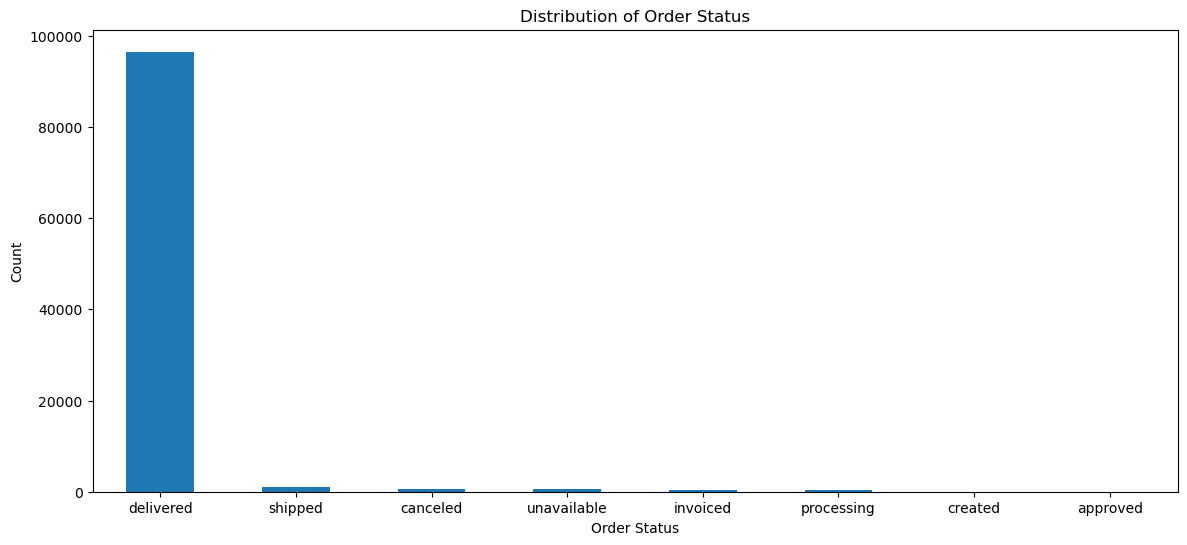

In [5]:
df_orders = olist_orders.merge(olist_customer, how='left', on='customer_id')

fig, ax = plt.subplots(figsize=(14, 6))
df_orders['order_status'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Order Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of Order Status')
plt.xticks(rotation=0)
plt.show()

By the time this dataset was created, the highest amount of orders went from delivered ones. Only 3% of all orders came from the other status.

For the next plots, let's dive into the real evolution of e-commerce in terms of purchase orders. For this, we have to extract some info on the `order_purchase_timestamp` following the topics:

    1. Transform timestamp columns;
    2. Extract time attributes from these datetime columns (year, month, day, day of week and hour);
    3. Evaluate the e-commerce scenario using this attributes.

In [6]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Extracting attributes for purchase date - Year and Month
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2018-08-13  af07308b275d755c9edb36a90c618231   
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                    2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  \
0                      3149                sao paulo             SP   
1                     47813                barreiras             BA   
2                     75265               vianopolis             GO   
3                     59296  sao goncalo do amarante             RN   
4                      9195              santo andre             SP   

   order_purchase_year  order_purchase_month order_purchase_month_name  \
0                 2017                    10                       Oct   
1                 2018                     7                       Jul   
2                 2018                     8                       Aug   
3                 2017                    11                       Nov   
4                 2018                     2                       Feb   

  order_purchase_year_month order_purchase_date  order_purchase_day  \
0                    201710            20171002                   2   
1                    201807            20180724                  24   
2                    201808            20180808                   8   
3                    201711            20171118                  18   
4                    201802            20180213                  13   

   order_purchase_dayofweek order_purchase_dayofweek_name  \
0                         0                           Mon   
1                         1                           Tue   
2                         2                           Wed   
3                         5                           Sat   
4                         1                           Tue   

   order_purchase_hour order_purchase_time_day  
0                   10                 Morning  
1                   20                   Night  
2                    8                 Morning  
3                   19                   Night  
4                   21                   Night

So now we can purpose a complete analysis on orders amount of brazilian e-commerce during the period of the dataset. For that let's plot three graphs using a `GridSpec` with the aim answear the following questions:

    1. Is there any growing trend on brazilian e-commerce?
    2. On what day of week brazilians customers tend to do online purchasing?
    3. What time brazilians customers tend do buy (Dawn, Morning, Afternoon or Night)?

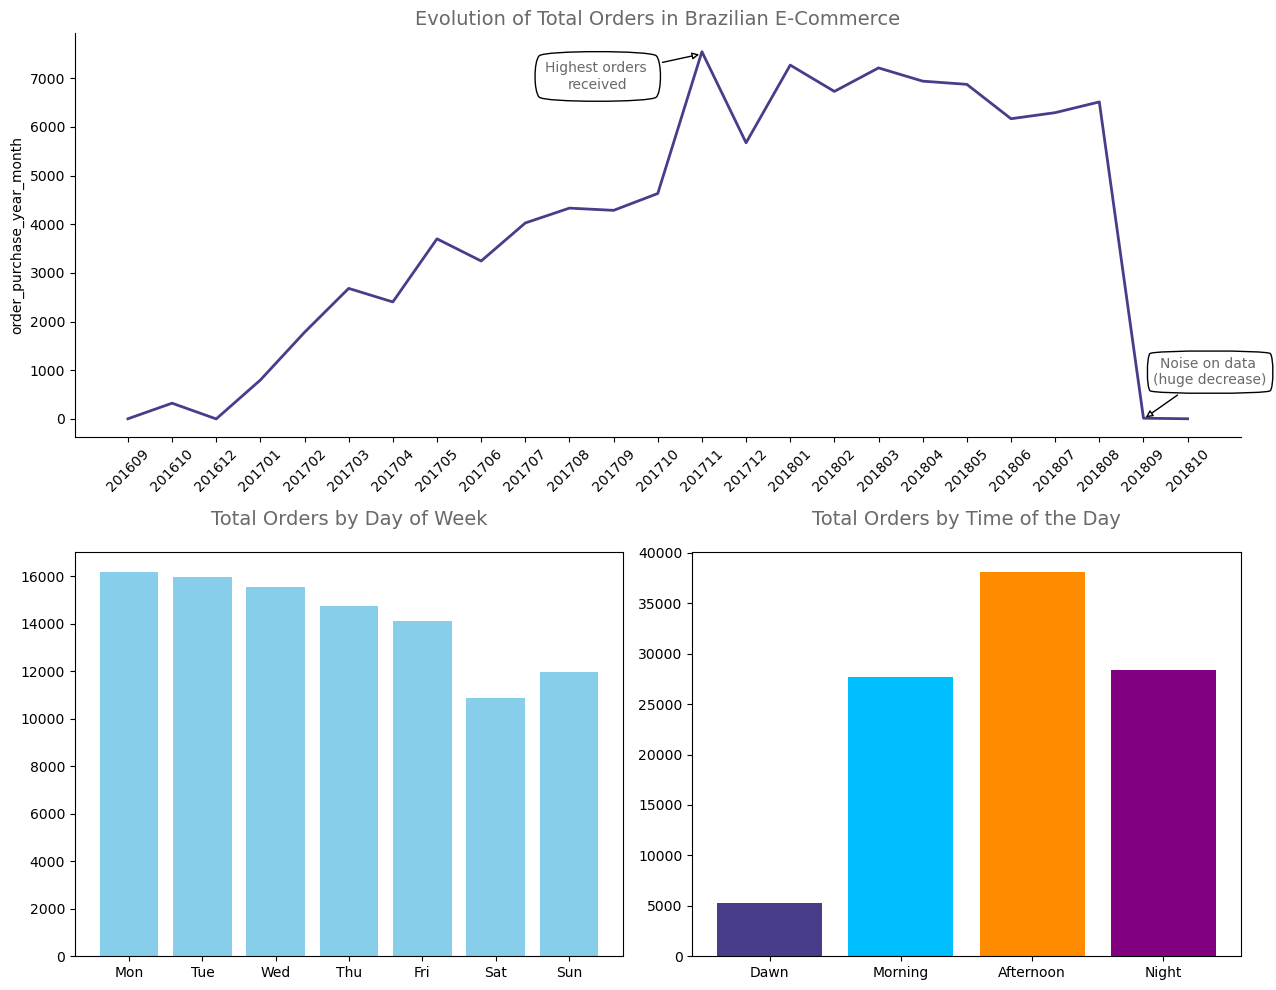

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
order_counts = df_orders['order_purchase_year_month'].value_counts().sort_index()
sns.lineplot(data=order_counts, ax=ax1, color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')

# Barchart - Total of orders by day of week
order_by_dayofweek = df_orders['order_purchase_dayofweek'].value_counts().sort_index()
ax2.bar(order_by_dayofweek.index, order_by_dayofweek, color='skyblue')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticks(order_by_dayofweek.index)
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total of orders by time of the day
order_by_time_day = df_orders['order_purchase_time_day'].value_counts().sort_index()
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
ax3.bar(order_by_time_day.index, order_by_time_day, color=day_color_list)
ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()


From the presented charts, several insights emerge:

**E-Commerce Growth Trend:** The depicted graphs distinctly showcase an upward trajectory in Brazilian e-commerce activities over time. While minor fluctuations and periodic peaks are evident, the overarching trend signifies an increasing preference among customers for online purchases.

**Day of Week Preference:** A discernible trend is observed with Mondays emerging as the favored day for Brazilian customers to engage in online shopping. Furthermore, the data accentuates a pronounced inclination towards purchasing during the afternoon hours.

**Data Anomaly Consideration:** Notably, a marked decline between August 2018 and September 2018 is apparent. This anomaly, possibly attributed to data irregularities, warrants further exploration. To facilitate a valid comparison between 2017 and 2018, it is prudent to exclusively consider orders from January to August in both years.


___
* _E-commerce: a comparison between 2017 and 2018_
___

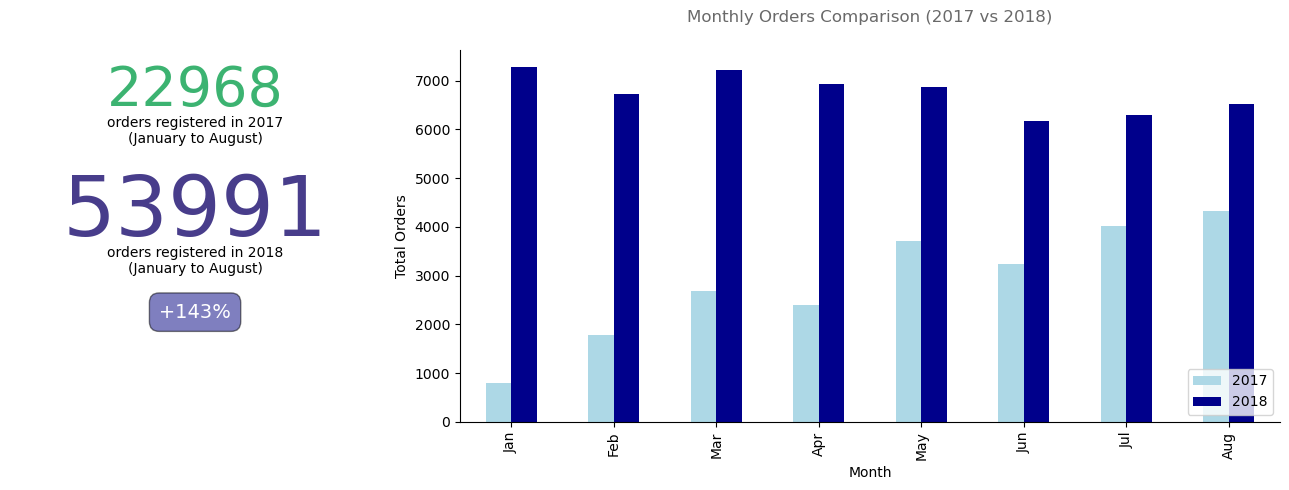

In [8]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - E-Commerce Growth Comparison
df_orders_compare = df_orders.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
year_orders = df_orders_compare['order_purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
ax1.text(0.5, 0.85, f'{year_orders[2017]}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.5, 0.75, 'orders registered in 2017\n(January to August)', fontsize=10, ha='center')
ax1.text(0.5, 0.5, f'{year_orders[2018]}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.5, 0.4, 'orders registered in 2018\n(January to August)', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.5, 0.28, f'{signal}{growth}%', fontsize=14, ha='center', color='white', 
         bbox=dict(facecolor='navy', alpha=0.5, pad=8, boxstyle='round,pad=0.5'))
ax1.axis('off')

# Bar chart - Monthly Sales Comparison
order_month_compare = df_orders_compare.groupby(['order_purchase_month', 'order_purchase_year']).size().unstack()
order_month_compare.plot(kind='bar', ax=ax2, color=['lightblue', 'darkblue'])
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax2.set_xticklabels(month_label)
ax2.set_title('Monthly Orders Comparison (2017 vs 2018)', size=12, color='dimgrey', pad=20)
ax2.legend(loc='lower right')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Orders')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


<a id="3.2"></a>
<font color="dodgerblue" size=+2.0><b>3.2 E-Commerce Around Brazil</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

    
To facilitate analysis of e-commerce across Brazilian states, we will proceed with the following steps:

    1. Integrate the orders dataset with the order_items dataset to consolidate relevant information.
    2. Utilize a dedicated Brazilian government API to obtain the regional classification for each customer's state.
    3. Develop informative visual representations to address pertinent business inquiries.

In [9]:
# Merging orders and order_items
df_orders_items = df_orders.merge(olist_order_items, how='left', on='order_id')

# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

# Threting geolocations outside brazilian map

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_prep = olist_geolocation[olist_geolocation.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

# Merging all the informations
df_orders_items = df_orders_items.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
df_orders_items = df_orders_items.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')
df_orders_items.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2018-08-13  af07308b275d755c9edb36a90c618231   
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                    2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  \
0                      3149                sao paulo             SP   
1                     47813                barreiras             BA   
2                     75265               vianopolis             GO   
3                     59296  sao goncalo do amarante             RN   
4                      9195              santo andre             SP   

   order_purchase_year  order_purchase_month order_purchase_month_name  \
0                 2017                    10                       Oct   
1                 2018                     7                       Jul   
2                 2018                     8                       Aug   
3                 2017                    11                       Nov   
4                 2018                     2                       Feb   

  order_purchase_year_month order_purchase_date  order_purchase_day  \
0                    201710            20171002                   2   
1                    201807            20180724                  24   
2                    201808            20180808                   8   
3                    201711            20171118                  18   
4                    201802            20180213                  13   

   order_purchase_dayofweek order_purchase_dayofweek_name  \
0                         0                           Mon   
1                         1                           Tue   
2                         2                           Wed   
3                         5                           Sat   
4                         1                           Tue   

   order_purchase_hour order_purchase_time_day  order_item_id  \
0                   10                 Morning            1.0   
1                   20                   Night            1.0   
2                    8                 Morning            1.0   
3                   19                   Night            1.0   
4                   21                   Night            1.0   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b

___
* _An overview of customer's order by region, state and city_
___

In [10]:
# Filtering data between 201701 and 201808
df_orders_filt = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

# Grouping data by region
df_regions_group = df_orders_filt.groupby(by=['order_purchase_year_month', 'nome_regiao'], as_index=False)
df_regions_group = df_regions_group.agg({'customer_id': 'count', 'price': 'sum'}).sort_values(by='order_purchase_year_month')
df_regions_group.columns = ['month', 'region', 'order_count', 'order_amount']
df_regions_group.reset_index(drop=True, inplace=True)

# Grouping data by city (top 10)
df_cities_group = df_orders_filt.groupby(by='geolocation_city', 
                                       as_index=False).count().loc[:, ['geolocation_city', 'order_id']]
df_cities_group = df_cities_group.sort_values(by='order_id', ascending=False).reset_index(drop=True)
df_cities_group = df_cities_group.iloc[:10, :]

In [11]:
df_orders_filt.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_purchase_year', 'order_purchase_month',
       'order_purchase_month_name', 'order_purchase_year_month',
       'order_purchase_date', 'order_purchase_day', 'order_purchase_dayofweek',
       'order_purchase_dayofweek_name', 'order_purchase_hour',
       'order_purchase_time_day', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'id', 'sigla', 'nome',
       'nome_regiao', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state'],
      dtype='object')

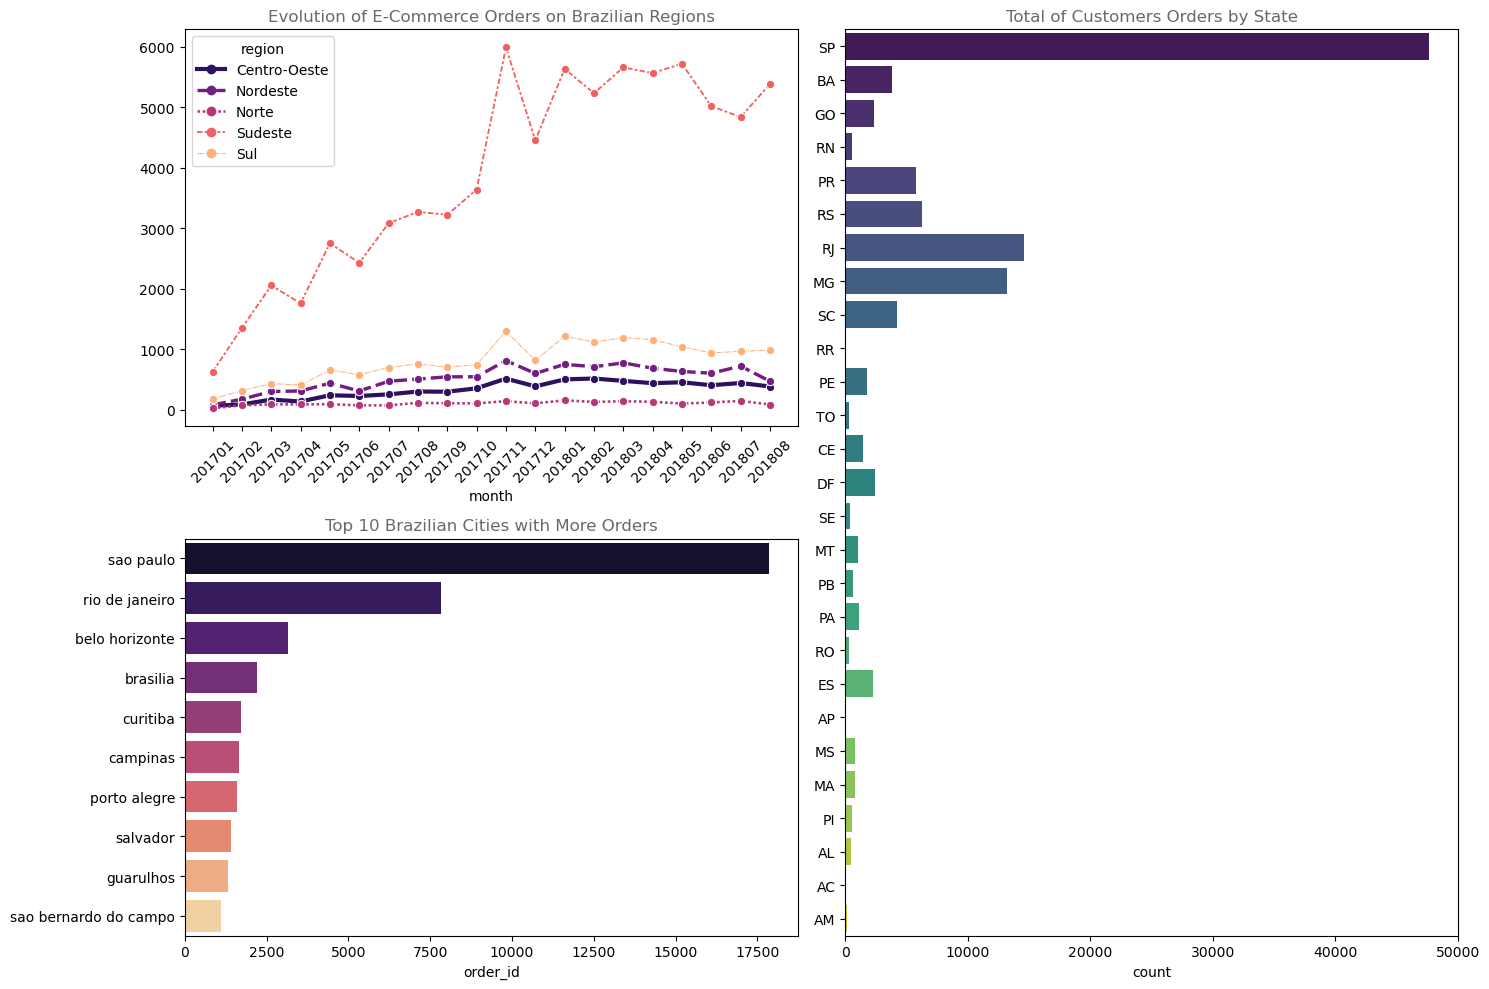

In [12]:
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

# Count of orders by region
sns.lineplot(x='month', y='order_count', ax=ax1, data=df_regions_group, hue='region', 
             size='region', style='region', palette='magma', markers=['o'] * 5)
ax1.set_title('Evolution of E-Commerce Orders on Brazilian Regions', size=12, color='dimgrey')
ax1.set_ylabel('')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

# Top cities with more customer orders in Brazil
sns.barplot(y='geolocation_city', x='order_id', data=df_cities_group, ax=ax2, palette='magma')
ax2.set_title('Top 10 Brazilian Cities with More Orders', size=12, color='dimgrey')
ax2.set_ylabel('')

# Total orders by state
sns.countplot(y='customer_state', ax=ax3, data=df_orders_filt, palette='viridis')
ax3.set_title('Total of Customers Orders by State', size=12, color='dimgrey')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()


___
What is the distribution of customers across Brazil? (based on a sample of 30,000 orders from 2018 visualized on a map)
___

In [13]:
# Zipping locations
lats = list(df_orders_items.query('order_purchase_year == 2018')['geolocation_lat'].dropna().values)[:30000]
longs = list(df_orders_items.query('order_purchase_year == 2018')['geolocation_lng'].dropna().values)[:30000]
locations = list(zip(lats, longs))

# Creating a mapa using folium
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1

___
* _**HeatMaps:** a good view to see where are the core of brazilian e-commerce customers_
___

In [14]:
# Grouping geolocation data for plotting a heatmap
heat_data = df_orders_filt.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count().iloc[:, :3]

# Creating a mapa using folium
map1 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMap
HeatMap(
    name='Mapa de Calor',
    data=heat_data,
    radius=10,
    max_zoom=13
).add_to(map1)

map1

**Evolution of E-Commerce Orders Over Time**

In [15]:
epoch_list = []
heatmap_evl_data = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201801)]
heatmap_evl_data = heatmap_evl_data[(heatmap_evl_data['order_purchase_year_month'].astype(int) <= 201808)]
time_index = heatmap_evl_data['order_purchase_year_month'].sort_values().unique()
for epoch in time_index:
    data_temp = heatmap_evl_data.query('order_purchase_year_month == @epoch')
    data_temp = data_temp.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count()
    data_temp = data_temp.sort_values(by='order_id', ascending=False).iloc[:, :3]
    epoch_list.append(data_temp.values.tolist())
    
# Creating a mapa using folium
map2 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMapWithTime
HeatMapWithTime(
    name='Evolution of Orders in a Geolocation Perspective',
    data=epoch_list,
    radius=10,
    index=list(time_index)
).add_to(map2)

map2

<a id="3.3"></a>
<font color="dodgerblue" size=+2.0><b>3.3 E-Commerce Impact on Economy</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

So far, our analysis has focused on addressing inquiries related to the E-commerce landscape, primarily centered around the quantity of orders processed. We've explored the distribution across months, days of the week, times of the day, and even delved into geolocation patterns across states.

Moving forward, our attention will shift to the financial aspects of e-commerce operations, encompassing the examination of order prices, shipping costs, and other monetary transactions.

___
 _Have the e-commerce sales exhibited growth over time?_
___




In [16]:
# Grouping data
df_month_aggreg = df_orders_filt.groupby(by=['order_purchase_year', 'order_purchase_year_month'], as_index=False)
df_month_aggreg = df_month_aggreg.agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
})

# Adding new columns for analysis
df_month_aggreg['price_per_order'] = df_month_aggreg['price'] / df_month_aggreg['order_id']
df_month_aggreg['freight_per_order'] = df_month_aggreg['freight_value'] / df_month_aggreg['order_id']
df_month_aggreg.head()

order_purchase_year order_purchase_year_month  order_id      price  \
0                 2017                    201701       966  120312.87   
1                 2017                    201702      1998  247303.02   
2                 2017                    201703      3041  374344.30   
3                 2017                    201704      2697  359927.23   
4                 2017                    201705      4176  506071.14   

   freight_value  price_per_order  freight_per_order  
0       16875.62       124.547484          17.469586  
1       38977.60       123.775285          19.508308  
2       57704.29       123.099079          18.975432  
3       52495.01       133.454664          19.464223  
4       80119.81       121.185618          19.185778

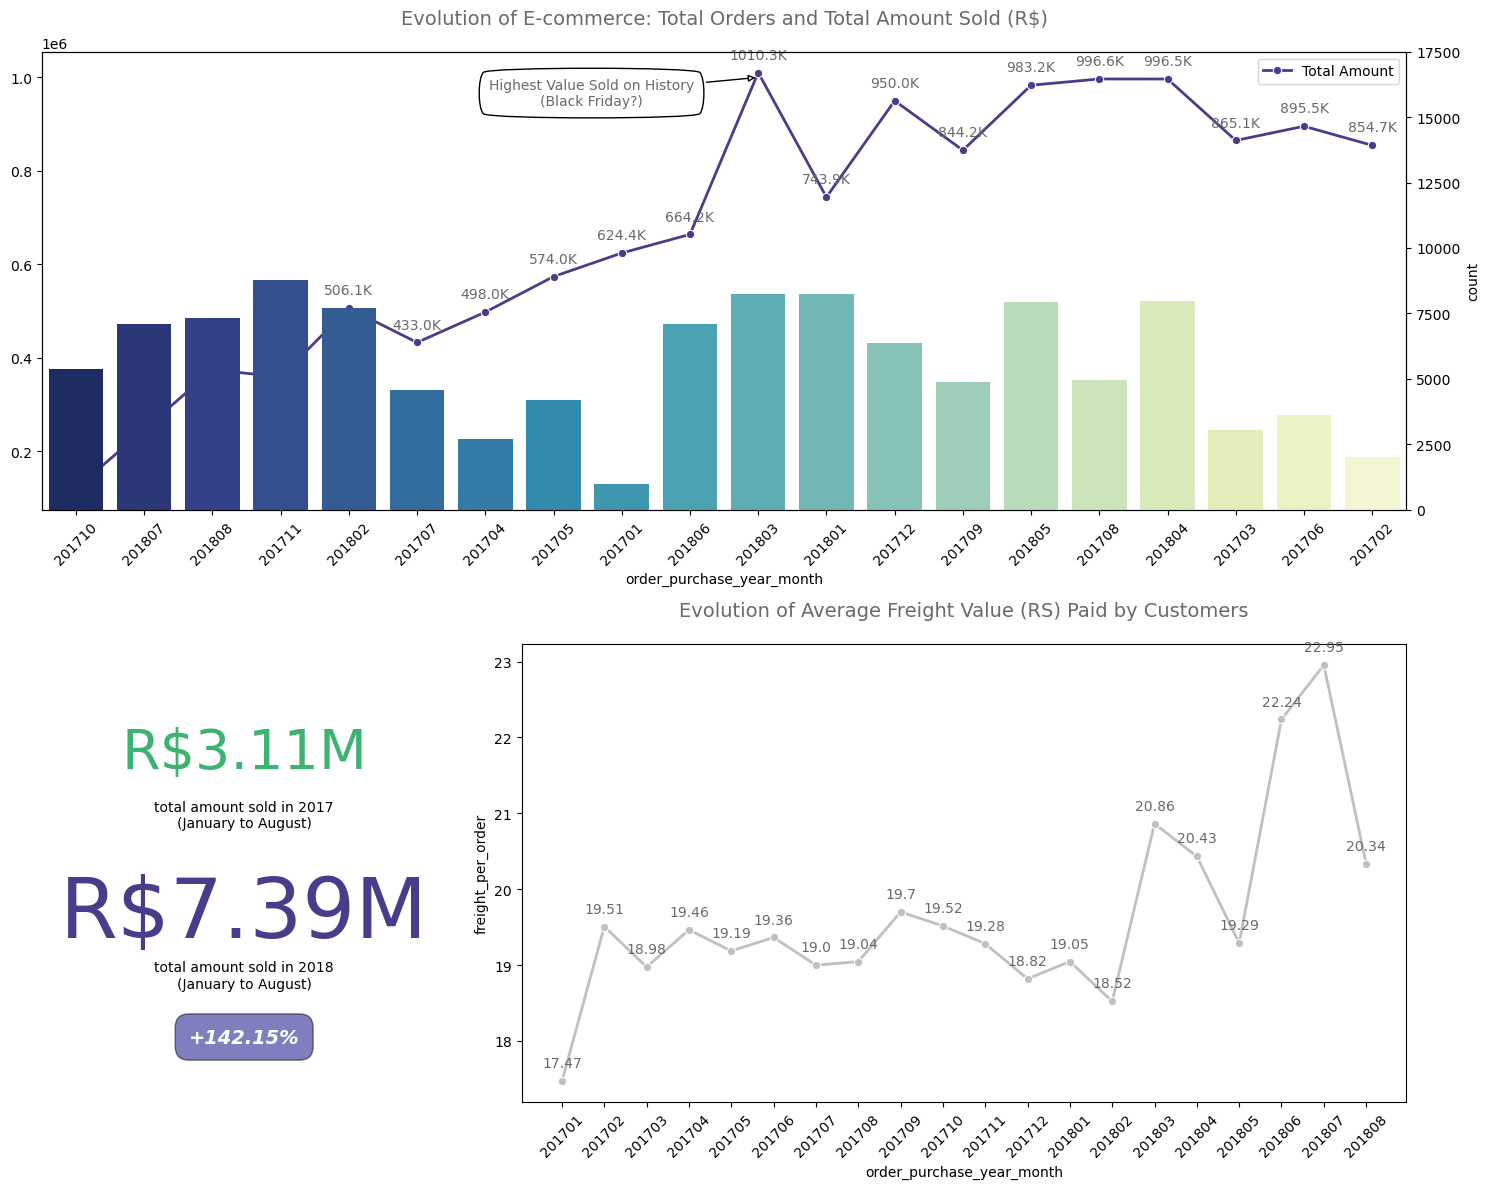

In [17]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1:])

# Plot 1 - Evolution of total orders and total sales on e-commerce
sns.lineplot(x='order_purchase_year_month', y='price', ax=ax1, data=df_month_aggreg, linewidth=2, 
             color='darkslateblue', marker='o', label='Total Amount')
ax1_twx = ax1.twinx()
sns.countplot(x='order_purchase_year_month', data=df_orders_filt, ax=ax1_twx, palette='YlGnBu_r')
ax1_twx.set_yticks(np.arange(0, 20000, 2500))

# Customizing the first plot
ax1.set_title('Evolution of E-commerce: Total Orders and Total Amount Sold (R$)', size=14, color='dimgrey', pad=20)
ax1.set_ylabel('')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.price.items():
    ax1.annotate(str(round(y/1000, 1))+'K', xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax1.annotate(f'Highest Value Sold on History\n(Black Friday?)', (10, 1000000), xytext=(-120, -20), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')

# Plot 2 - Big Numbers of Sales Evolution
df_sales_compare = df_month_aggreg.query('order_purchase_year_month in ["201701", "201702", "201703", "201704", "201705", "201706", "201707", "201708", "201801", "201802", "201803", "201804", "201805", "201806", "201807", "201808"]')
sold_2017 = df_sales_compare.query('order_purchase_year == 2017')['price'].sum()
sold_2018 = df_sales_compare.query('order_purchase_year == 2018')['price'].sum()
growth = 1 + (sold_2017 / sold_2018)
ax2.text(0.50, 0.73, 'R$' + str(round(sold_2017/1000000, 2)) + 'M', fontsize=40, color='mediumseagreen', ha='center')
ax2.text(0.50, 0.60, 'total amount sold in 2017\n(January to August)', fontsize=10, ha='center')
ax2.text(0.50, 0.36, 'R$' + str(round(sold_2018/1000000, 2)) + 'M', fontsize=60, color='darkslateblue', ha='center')
ax2.text(0.50, 0.25, 'total amount sold in 2018\n(January to August)', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax2.text(0.50, 0.13, f'{signal}{str(round(100 * growth, 2))}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax2.axis('off')

# Plot 3 - Evolution of mean freight value paid by the customers
sns.lineplot(x='order_purchase_year_month', y='freight_per_order', data=df_month_aggreg, linewidth=2, 
             color='silver', marker='o', ax=ax3)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.freight_per_order.items():
    ax3.annotate(round(y, 2), xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax3.set_title('Evolution of Average Freight Value (RS) Paid by Customers', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()


___
* _How the total sales (sum of price) are concentraded in brazilian states?_
___

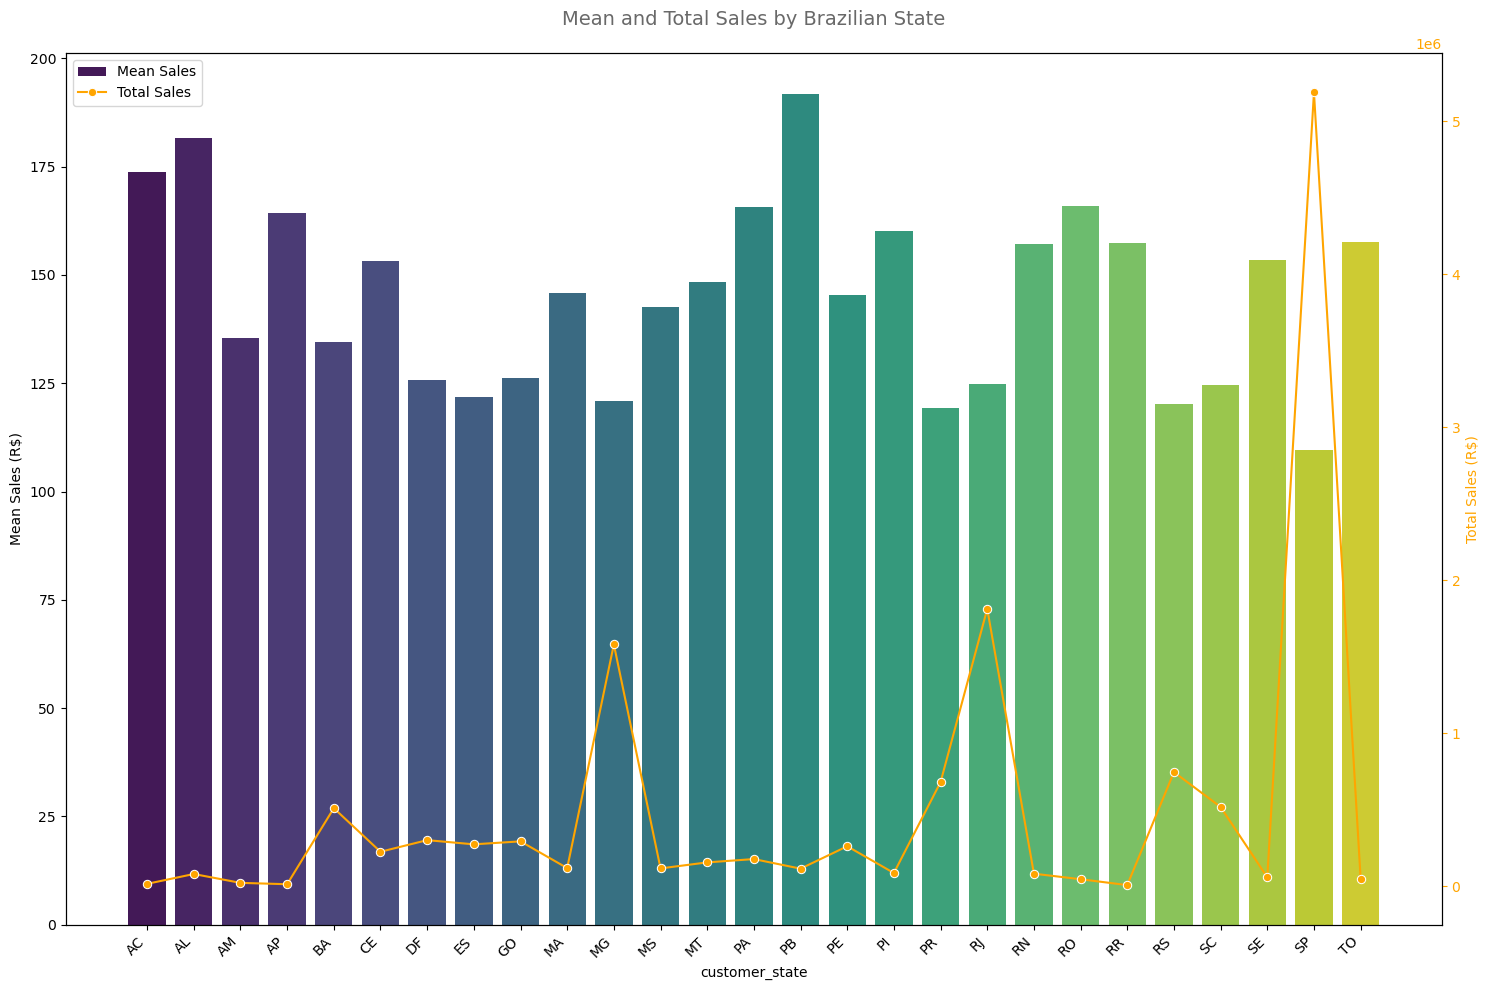

In [18]:
# Grouping data
state_group = df_orders_filt.groupby('customer_state')['price'].agg(['mean', 'sum']).reset_index()

# Creating figure
fig, ax = plt.subplots(figsize=(15, 10))

# Bar plot - Mean and Total Sales by State
sns.barplot(x='customer_state', y='mean', data=state_group, palette='viridis', ax=ax, label='Mean Sales')
ax2 = ax.twinx()
sns.lineplot(x='customer_state', y='sum', data=state_group, color='orange', marker='o', ax=ax2, label='Total Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Mean and Total Sales by Brazilian State', size=14, color='dimgrey', pad=20)
ax.set_ylabel('Mean Sales (R$)')
ax2.set_ylabel('Total Sales (R$)')
ax2.yaxis.label.set_color('orange')
ax2.tick_params(axis='y', colors='orange')

# Adding a legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()



The intriguing observation arises from the contrast between states with high total sales and comparatively lower average order values. For instance, the state of São Paulo (SP) serves as an illustrative example. São Paulo stands out as a leading hub for e-commerce, with an impressive total sales figure of 5,188,099 units. Notably, customers within São Paulo exhibit a tendency to spend relatively less per order, averaging at 110.00 per transaction.

How about the freight?

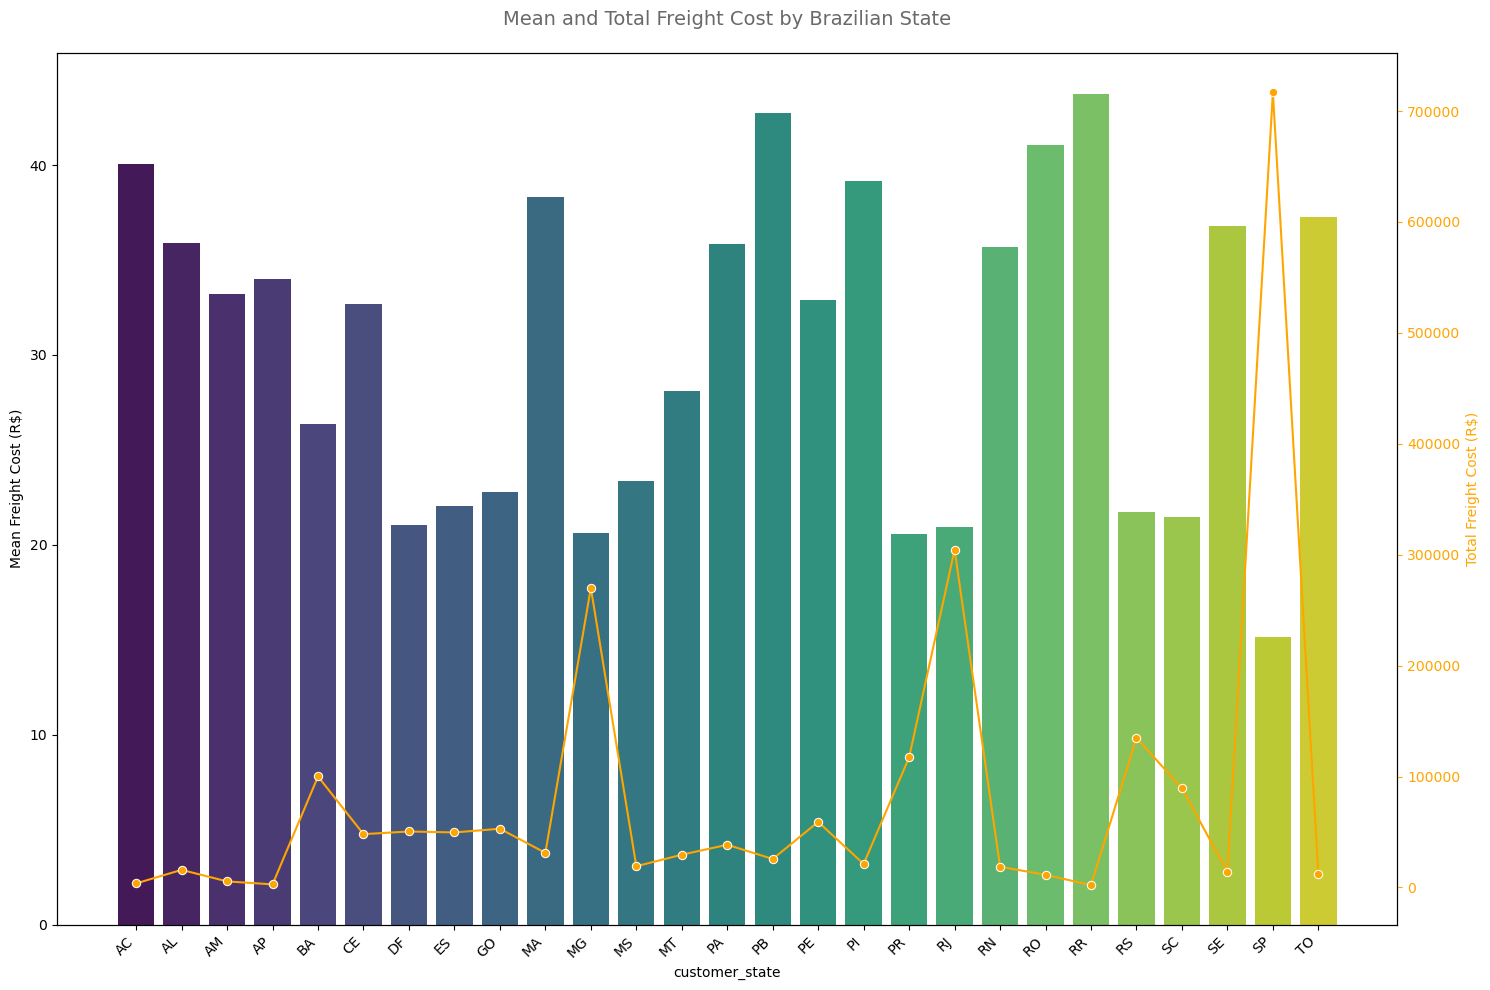

In [19]:
# Grouping data
state_group_freight = df_orders_filt.groupby('customer_state')['freight_value'].agg(['mean', 'sum']).reset_index()

# Creating figure
fig, ax = plt.subplots(figsize=(15, 10))

# Bar plot - Mean and Total Freight Cost by State
sns.barplot(x='customer_state', y='mean', data=state_group_freight, palette='viridis', ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='customer_state', y='sum', data=state_group_freight, color='orange', marker='o', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Mean and Total Freight Cost by Brazilian State', size=14, color='dimgrey', pad=20)
ax.set_ylabel('Mean Freight Cost (R$)')
ax2.set_ylabel('Total Freight Cost (R$)')
ax2.yaxis.label.set_color('orange')
ax2.tick_params(axis='y', colors='orange')

plt.tight_layout()
plt.show()


From this visualization, insights can be derived regarding states with elevated average freight values. For instance, it is evident that customers situated in regions such as Roraima (RR), Paraíba (PB), Rondônia (RO), and Acre (AC) consistently incur higher freight costs compared to other areas.

___
* _What are the best states to buy in Brazil? An analysis on sales, freight and delivery time_
___

In [20]:
# Sample data
df_orders_filt_2 = pd.DataFrame({'order_purchase_timestamp': [datetime(2023, 1, 1), datetime(2023, 1, 5), datetime(2023, 1, 10)],
                               'order_delivered_customer_date': [datetime(2023, 1, 3), datetime(2023, 1, 8), datetime(2023, 1, 15)], 
                               'order_estimated_delivery_date': [datetime(2023, 1, 4), datetime(2023, 1, 7), datetime(2023, 1, 12)],
                               'customer_state': ['CA', 'TX', 'FL'],
                               'freight_value': [10.5, 8.7, 12.4]})

# Calculate time to delivery
df_orders_filt_2['time_to_delivery'] = (df_orders_filt_2['order_delivered_customer_date'] - df_orders_filt_2['order_purchase_timestamp']).dt.days

# Calculate diff between estimated and actual delivery
df_orders_filt_2['diff_estimated_delivery'] = (df_orders_filt_2['order_delivered_customer_date'] - df_orders_filt_2['order_estimated_delivery_date']).dt.days

# Group by state and calculate mean
states_avg_grouped = df_orders_filt_2.groupby(by='customer_state', as_index=False).mean()

# Extract relevant columns
states_freight_paid = states_avg_grouped[['customer_state', 'freight_value']]  
states_time_to_delivery = states_avg_grouped[['customer_state', 'time_to_delivery']]
states_estimated_delivery = states_avg_grouped[['customer_state', 'diff_estimated_delivery']]

# Sorting  
states_freight_paid = states_freight_paid.sort_values(by='freight_value', ascending=False)
states_time_to_delivery = states_time_to_delivery.sort_values(by='time_to_delivery', ascending=False) 
states_estimated_delivery = states_estimated_delivery.sort_values(by='diff_estimated_delivery')

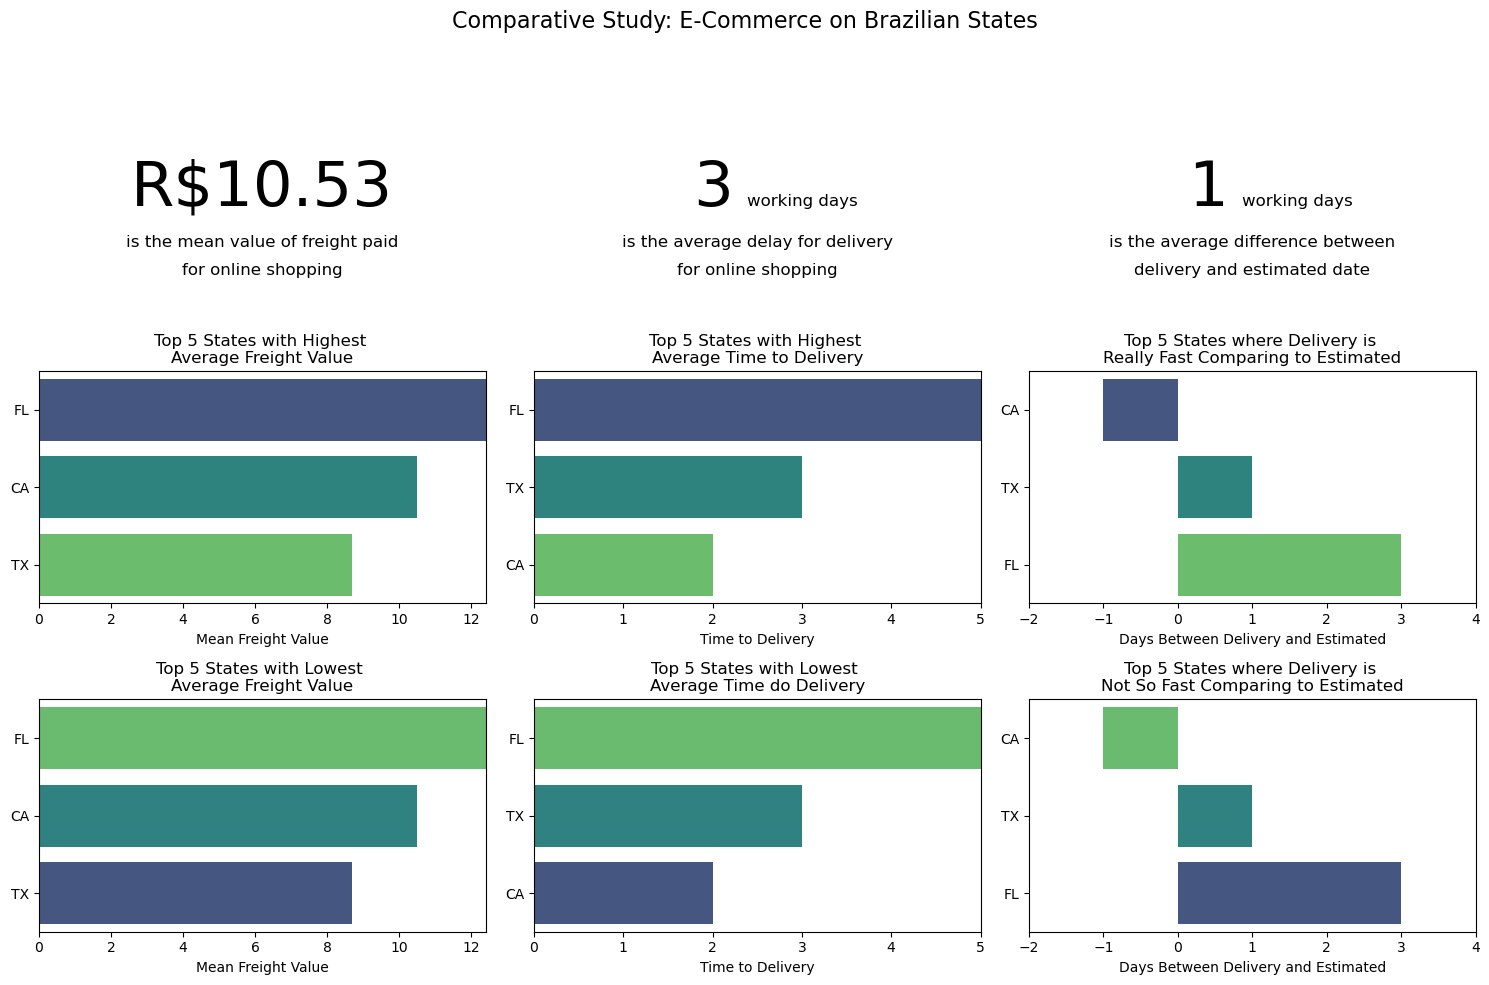

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Plot Pack 01 - Freight value paid on states
sns.barplot(x='freight_value', y='customer_state', data=states_freight_paid.head(), ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Top 5 States with Highest \nAverage Freight Value', size=12, color='black')
sns.barplot(x='freight_value', y='customer_state', data=states_freight_paid.tail(), ax=axs[2, 0], palette='viridis_r')
axs[2, 0].set_title('Top 5 States with Lowest \nAverage Freight Value', size=12, color='black')
for ax in axs[1, 0], axs[2, 0]:
    ax.set_xlabel('Mean Freight Value')
    ax.set_xlim(0, states_freight_paid['freight_value'].max())
    ax.set_ylabel('')

# Annotations
axs[0, 0].text(0.50, 0.30, f'R${round(df_orders_filt_2.freight_value.mean(), 2)}', fontsize=45, ha='center')
axs[0, 0].text(0.50, 0.12, 'is the mean value of freight paid', fontsize=12, ha='center')
axs[0, 0].text(0.50, 0.00, 'for online shopping', fontsize=12, ha='center')
axs[0, 0].axis('off')

# Plot Pack 02 - Time to delivery on states
sns.barplot(x='time_to_delivery', y='customer_state', data=states_time_to_delivery.head(), ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Top 5 States with Highest \nAverage Time to Delivery', size=12, color='black')
sns.barplot(x='time_to_delivery', y='customer_state', data=states_time_to_delivery.tail(), ax=axs[2, 1], palette='viridis_r')
axs[2, 1].set_title('Top 5 States with Lowest \nAverage Time do Delivery', size=12, color='black')
for ax in axs[1, 1], axs[2, 1]:
    ax.set_xlabel('Time to Delivery')
    ax.set_xlim(0, states_time_to_delivery['time_to_delivery'].max())
    ax.set_ylabel('')
    
# Annotations
axs[0, 1].text(0.40, 0.30, f'{int(df_orders_filt_2.time_to_delivery.mean())}', fontsize=45, ha='center')
axs[0, 1].text(0.60, 0.30, 'working days', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.12, 'is the average delay for delivery', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.00, 'for online shopping', fontsize=12, ha='center')
axs[0, 1].axis('off')
    
# Plot Pack 03 - Differnece between delivered and estimated on states
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=states_estimated_delivery.head(), ax=axs[1, 2], palette='viridis')
axs[1, 2].set_title('Top 5 States where Delivery is \nReally Fast Comparing to Estimated', size=12, color='black')
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=states_estimated_delivery.tail(), ax=axs[2, 2], palette='viridis_r')
axs[2, 2].set_title('Top 5 States where Delivery is \nNot So Fast Comparing to Estimated', size=12, color='black')
for ax in axs[1, 2], axs[2, 2]:
    ax.set_xlabel('Days Between Delivery and Estimated')
    ax.set_xlim(states_estimated_delivery['diff_estimated_delivery'].min()-1, 
                states_estimated_delivery['diff_estimated_delivery'].max()+1)
    ax.set_ylabel('')

# Annotations
axs[0, 2].text(0.40, 0.30, f'{int(df_orders_filt_2.diff_estimated_delivery.mean())}', fontsize=45, ha='center')
axs[0, 2].text(0.60, 0.30, 'working days', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.12, 'is the average difference between', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.00, 'delivery and estimated date', fontsize=12, ha='center')
axs[0, 2].axis('off') 
    
plt.suptitle('Comparative Study: E-Commerce on Brazilian States', size=16)
plt.tight_layout()
plt.show()


<a id="3.4"></a>
<font color="dodgerblue" size=+2.0><b>3.4 Payment Type Analysis</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Within the dataset, information concerning the payment aspects of orders is also available. To delve into the potential impact of payments on the e-commerce landscape, we aim to construct a concise dashboard highlighting two key dimensions: "Payment Types" and "Payment Installments". The objective is to offer an overview of the prevailing preferences of e-commerce customers when it comes to fulfilling their orders.

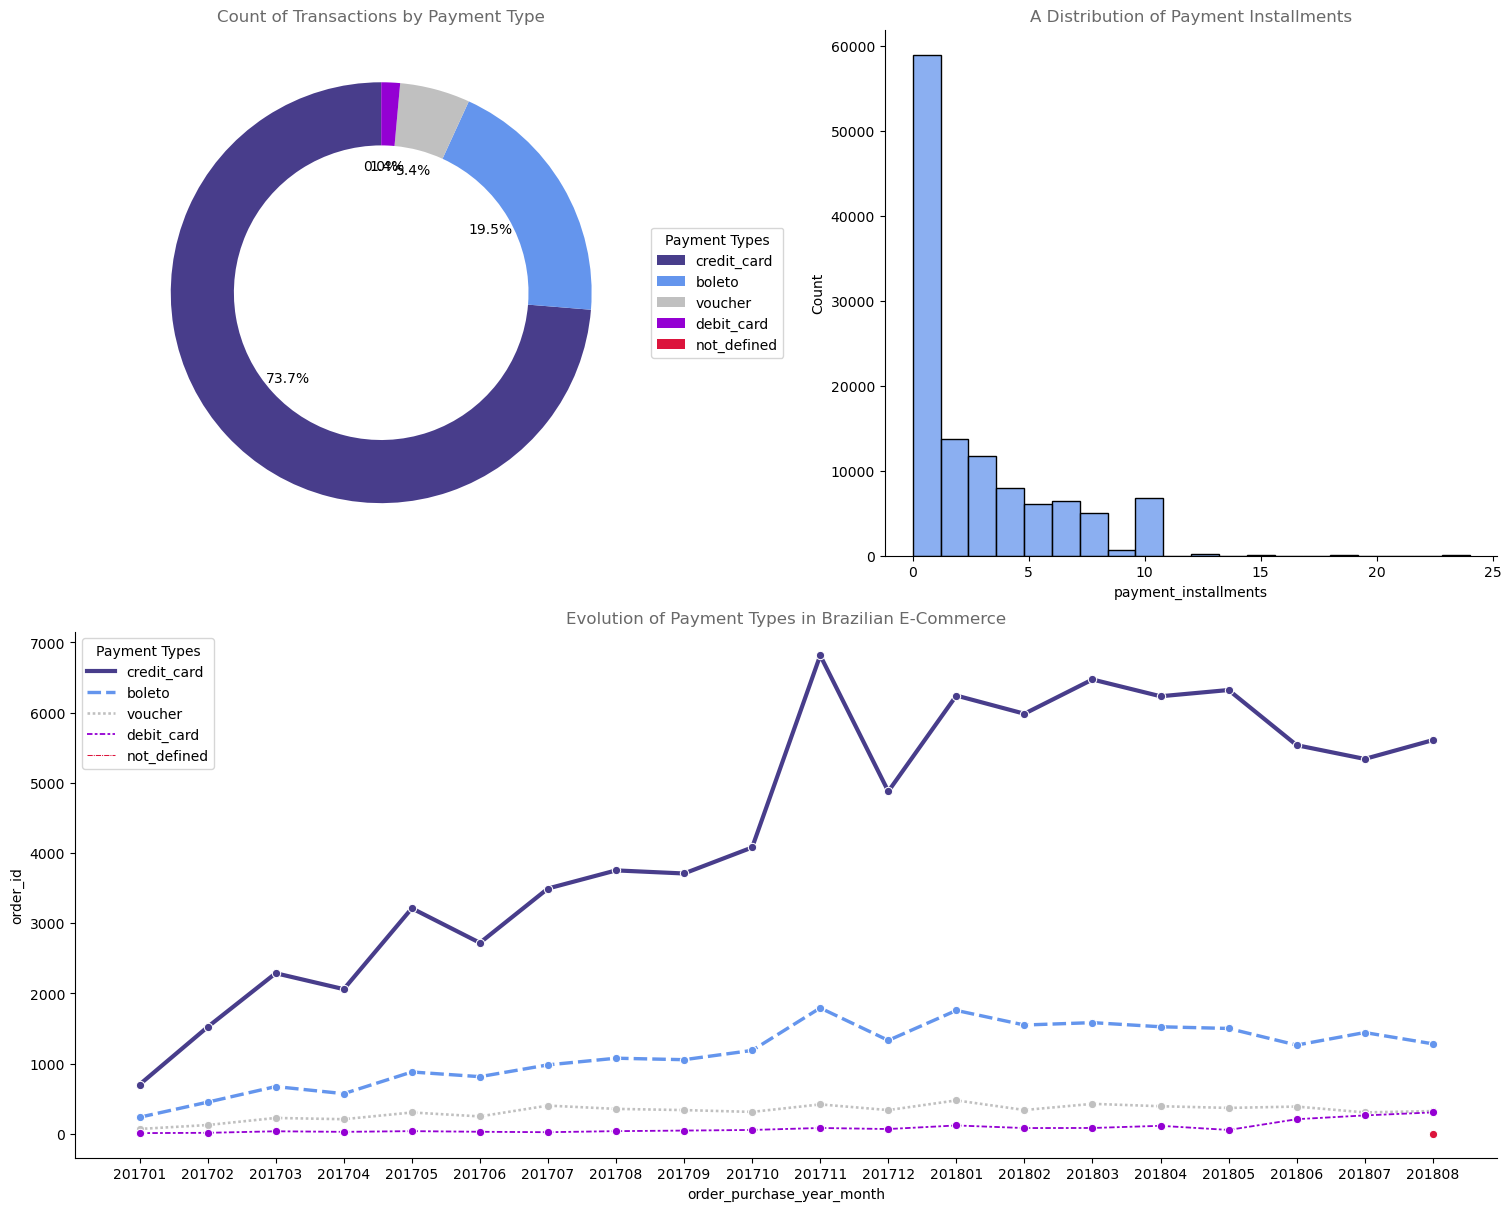

In [22]:
# Grouping data
df_orders_pay = df_orders_filt.merge(olist_order_payments, how='left', on='order_id')

# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Plot 1 - Payment types in a donut chart
colors = ['darkslateblue', 'cornflowerblue', 'silver', 'darkviolet', 'crimson']
payment_type_counts = df_orders_pay['payment_type'].value_counts()
wedges, labels, autopct = ax1.pie(payment_type_counts, colors=colors, autopct='%1.1f%%', startangle=90,
                                   wedgeprops=dict(width=0.3))
ax1.add_artist(plt.Circle((0,0),0.2,fc='white'))
ax1.set_title('Count of Transactions by Payment Type', size=12, color='dimgrey')
ax1.legend(wedges, payment_type_counts.index, title="Payment Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot 2 - Payment installments
sns.histplot(data=df_orders_pay, x='payment_installments', ax=ax2, bins=20, color='cornflowerblue')
ax2.set_title('A Distribution of Payment Installments', color='dimgrey', size=12)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Plot 3 - Evolution of payment types
payment_evl = df_orders_pay.groupby(by=['order_purchase_year_month', 'payment_type'], as_index=False).count()
payment_evl = payment_evl.loc[:, ['order_purchase_year_month', 'payment_type', 'order_id']]
payment_evl = payment_evl.sort_values(by=['order_purchase_year_month', 'order_id'], ascending=[True, False])
sns.lineplot(x='order_purchase_year_month', y='order_id', data=payment_evl, ax=ax3, hue='payment_type',
             style='payment_type', size='payment_type', palette=colors, marker='o')
ax3.set_title('Evolution of Payment Types in Brazilian E-Commerce', size=12, color='dimgrey')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.legend(title="Payment Types")

plt.show()


The line chart reveals that credit card payments have dominated Brazilian e-commerce. However, there has been a slight decrease in this payment type since March of 2018. In contrast, debit card payments have been rising steadily since May of 2018, presenting an opportunity for investors to improve services for this payment method.  

The bar chart shows Brazilian customer payment preferences. The majority pay for orders in a single installment. Notably, a substantial number make payments over 10 installments.

<a id="4"></a>
<font color="dodgerblue" size=+2.5><b>4. Natural Language Processing</b></font>

As long as we could improve our relationship with the data, the path is open to start the Natural Language Processing step to analyze the comments left on e-commerce orders. The goal is to use this as input to a `sentimental analysis` model for understanding the customer's sentiment on purchasing things online. Let's take a look on the reviews data.

<a id="4.1"></a>
<font color="dodgerblue" size=+2.0><b>4.1 Data Understanding</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

In [23]:
df_comments = olist_order_reviews.loc[:, ['review_score', 'review_comment_message']]
df_comments = df_comments.dropna(subset=['review_comment_message'])
df_comments = df_comments.reset_index(drop=True)
print(f'Dataset shape: {df_comments.shape}')
df_comments.columns = ['score', 'comment']
df_comments.head()

Dataset shape: (40977, 2)


score                                            comment
0      5              Recebi bem antes do prazo estipulado.
1      5  Parabéns lojas lannister adorei comprar pela I...
2      4  aparelho eficiente. no site a marca do aparelh...
3      4    Mas um pouco ,travando...pelo valor ta Boa.\r\n
4      5  Vendedor confiável, produto ok e entrega antes...

We have about 41k comments available to train a sentiment analysis model. However, before we can do so, these comments require extensive text preparation. We need to transform the raw text into vectors understandable to a machine learning model. This will be a long process, but it is a necessary step. Now, let's proceed with the text preprocessing.

<a id="4.2"></a>
<font color="dodgerblue" size=+2.0><b>4.2 Regular Expressions</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Since we scraped these comments from the global internet, they likely contain HTML tags, newlines, special characters, and other messy content. To clean this up, we'll need to leverage regular expressions to find and handle these patterns.

First, we'll define a function to analyze the results of our regex. This will make it easier to validate that our text preprocessing is working as intended.

By building this regex analysis function upfront, we can methodically test and refine our text cleaning process. Handling the inevitable dirtiness of web data is a key step before feeding it into our sentiment model.

In [24]:
def find_patterns(re_pattern, text_list):
    """
    Args:
    ---------
    re_pattern: regular expression pattern to be used on search [type: string]
    text_list: list with text strings [type: list]
    
    Returns:
    positions_dict: python dictionary with key-value pars as below:
        text_idx: [(start_pattern1, end_pattern1), (start_pattern1, end_pattern2), ... (start_n, end_n)]
    """
    
    # Compiling the Regular Expression passed as a arg
    p = re.compile(re_pattern)
    positions_dict = {}
    i = 0
    for c in text_list:
        match_list = []
        iterator = p.finditer(c)
        for match in iterator:
            match_list.append(match.span())
        control_key = f'Text idx {i}'
        if len(match_list) == 0:
            pass
        else:
            positions_dict[control_key] = match_list
        i += 1
        
    """p = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    pattern_dict = find_patterns(p, reviews_breakline)
    print(len(pattern_dict))
    pattern_dict
    for idx in [int(c.split(' ')[-1]) for c in list(pattern_dict.keys())]:
        print(f'{reviews_breakline[idx]}\n')"""

    return positions_dict

        
def print_step_result(text_list_before, text_list_after, idx_list):
    """
    Print the content of text examples before and after transformation.
    
    Args:
        text_list_before (list): List of text content before transformation.
        text_list_after (list): List of text content after transformation.
        idx_list (list): List of indexes to be printed.
    """
    
    print("\nPrinting Text Transformation Results:\n")
    
    for i, idx in enumerate(idx_list, start=1):
        print(f"--- Text {i} ---\n")
        print("Before:")
        print(text_list_before[idx])
        print("\nAfter:")
        print(text_list_after[idx])
        print("\n" + "=" * 40 + "\n")

<a id="4.2.1"></a>
<font color="dodgerblue" size=+1.5><b>4.2.1 Breakline and Carriage Return</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

In [25]:
def re_breakline(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('[\n\r]', ' ', r) for r in text_list]

In [26]:
# Creating a list of comment reviews
reviews = list(df_comments['comment'].values)

# Applying RegEx
reviews_breakline = re_breakline(reviews)
df_comments['re_breakline'] = reviews_breakline

# Verifying results
print_step_result(reviews, reviews_breakline, idx_list=[48])


Printing Text Transformation Results:

--- Text 1 ---

Before:
Estava faltando apenas um produto, eu recebi hoje , muito obrigada!
Tudo certo!

Att 

Elenice.

After:
Estava faltando apenas um produto, eu recebi hoje , muito obrigada!  Tudo certo!    Att     Elenice.




Here it's possible to see the tags \r (_carriage return_ code ASCII 10) and \n (_new line_ code ASCII 13). With RegEx, we could get rid of those patterns.

<a id="4.2.2"></a>
<font color="dodgerblue" size=+1.5><b>4.2.2 Sites and Hiperlinks</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Another pattern that must be threated is sites and hiperlinks. Let's define another function to apply RegEx on this.

In [27]:
def re_hiperlinks(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

In [28]:
# Applying RegEx
reviews_hiperlinks = re_hiperlinks(reviews_breakline)
df_comments['re_hiperlinks'] = reviews_hiperlinks

# Verifying results
print_step_result(reviews_breakline, reviews_hiperlinks, idx_list=[10796, 12782])


Printing Text Transformation Results:

--- Text 1 ---

Before:
O produto chegou a ser entregue, porém foi recusado, poisja havia cancelado por ter comprado o tamanho errado!

After:
O produto chegou a ser entregue, porém foi recusado, poisja havia cancelado por ter comprado o tamanho errado!


--- Text 2 ---

Before:
Muito obrigada lannister 

After:
Muito obrigada lannister 




<a id="4.2.3"></a>
<font color="dodgerblue" size=+1.5><b>4.2.3 Dates</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Well, as long as we are dealing with customers reviews on items bought online, probably date mentions are very common. Let's see some examples and apply a RegEx to change this to `data` (means `date` in english).

In [29]:
def re_dates(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' data ', r) for r in text_list]

In [30]:
# Applying RegEx
reviews_dates = re_dates(reviews_hiperlinks)
df_comments['re_dates'] = reviews_dates



<a id="4.2.4"></a>
<font color="dodgerblue" size=+1.5><b>4.2.4 Money</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Another pattern that probably is very common on this kind of source is representations of money (R$ \__,\__). To improve our model, maybe it's a good idea to transform this pattern into a key word like `valor` (means `money` or `amount` in english).

In [31]:
def re_money(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' dinheiro ', r) for r in text_list]

In [32]:
# Applying RegEx
reviews_money = re_money(reviews_dates)
df_comments['re_money'] = reviews_money

# Verifying results
print_step_result(reviews_dates, reviews_money, idx_list=[26020, 33297, 32998])


Printing Text Transformation Results:

--- Text 1 ---

Before:
Produto bom e chegou no prazo estipulado! 

After:
Produto bom e chegou no prazo estipulado! 


--- Text 2 ---

Before:
muito satisfeita

After:
muito satisfeita


--- Text 3 ---

Before:
embora o prazo seja de 14 dias úteis, o produto comprado no dia 09/05 só veio chegar no dia 2/6 e alem de chegar super atrasado ainda veio o produto errado.

After:
embora o prazo seja de 14 dias úteis, o produto comprado no dia 09/05 só veio chegar no dia 2/6 e alem de chegar super atrasado ainda veio o produto errado.




<a id="4.2.5"></a>
<font color="dodgerblue" size=+1.5><b>4.2.5 Numbers</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Here we will try to find numbers on reviews and replace them with another string `numero` (that means `number`, in english). We could just replace the numbers with whitespace but maybe this would generated some information loss. Let's see what we've got:

In [33]:
def re_numbers(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('[0-9]+', ' numero ', r) for r in text_list]

In [34]:
# Applying RegEx
reviews_numbers = re_numbers(reviews_money)
df_comments['re_numbers'] = reviews_numbers

# Verifying results
print_step_result(reviews_money, reviews_numbers, idx_list=[68])


Printing Text Transformation Results:

--- Text 1 ---

Before:
Comprei o produto dia 25 de fevereiro e hoje dia 29 de marco não fora entregue na minha residência. Não sei se os correios desse Brasil e péssimo ou foi a própria loja que demorou postar.

After:
Comprei o produto dia  numero  de fevereiro e hoje dia  numero  de marco não fora entregue na minha residência. Não sei se os correios desse Brasil e péssimo ou foi a própria loja que demorou postar.




<a id="4.2.6"></a>
<font color="dodgerblue" size=+1.5><b>4.2.6 Negation</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

This session was thought and discussed in a special way. The problem statement is that when we remove the stopwords, probabily we would loose the meaning of some phrases about removing the negation words like `não` (not), for example. So, because of this, maybe is a good idea to replace some negation words with some common words indicating a negation meaning.

In [35]:
def re_negation(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negação ', r) for r in text_list]

In [36]:
# Applying RegEx
reviews_negation = re_negation(reviews_numbers)
df_comments['re_negation'] = reviews_negation

# Verifying results
print_step_result(reviews_numbers, reviews_negation, idx_list=[4783, 4627, 4856, 4904])


Printing Text Transformation Results:

--- Text 1 ---

Before:
Ótimo relógio estou bastante satisfeito recomendo a todos essa loja está de parabéns obrigado 

After:
Ótimo relógio estou bastante satisfeito recomendo a todos essa loja está de parabéns obrigado 


--- Text 2 ---

Before:
Envio muito rápido e chegou muito rápido também. 

After:
Envio muito rápido e chegou muito rápido também. 


--- Text 3 ---

Before:
Gostei do produto. Recomendo.

After:
Gostei do produto. Recomendo.


--- Text 4 ---

Before:
Igualzinho o que eu pedi. Lindo

After:
Igualzinho o que eu pedi. Lindo




<a id="4.2.7"></a>
<font color="dodgerblue" size=+1.5><b>4.2.7 Special Characters</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

The search for special characteres is a really special one because we see a lot of this pattern on online comments. Let's build an RegEx motor to find those ones.

In [37]:
def re_special_chars(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('\W', ' ', r) for r in text_list]

In [38]:
# Applying RegEx
reviews_special_chars = re_special_chars(reviews_negation)
df_comments['re_special_chars'] = reviews_special_chars

# Verifying results
print_step_result(reviews_negation, reviews_special_chars, idx_list=[45, 135, 234])


Printing Text Transformation Results:

--- Text 1 ---

Before:
Este foi o pedido  Balde Com  numero  Peças - Blocos De Montar  numero  un -  dinheiro  cada ( negação  FOI ENTREGUE)  Vendido e entregue targaryen  Tapete de Eva Nº Letras  numero  Peças Crianças  numero  un -  dinheiro  (ESTE FOI ENTREG

After:
Este foi o pedido  Balde Com  numero  Peças   Blocos De Montar  numero  un    dinheiro  cada   negação  FOI ENTREGUE   Vendido e entregue targaryen  Tapete de Eva Nº Letras  numero  Peças Crianças  numero  un    dinheiro   ESTE FOI ENTREG


--- Text 2 ---

Before:
Produto  negação  recomendo  negação  ler em nenhum dispositivo

After:
Produto  negação  recomendo  negação  ler em nenhum dispositivo


--- Text 3 ---

Before:
Produto de ótima qualidade. Adorei!

After:
Produto de ótima qualidade  Adorei 




<a id="4.2.8"></a>
<font color="dodgerblue" size=+1.5><b>4.2.8 Additional Whitespaces</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

After all the steps we have taken over here, it's important to clean our text eliminating unecessary whitespaces. Let's apply a RegEx for this and see what we've got.

In [39]:
def re_whitespaces(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

In [40]:
# Applying RegEx
reviews_whitespaces = re_whitespaces(reviews_special_chars)
df_comments['re_whitespaces'] = reviews_whitespaces

# Verifying results
print_step_result(reviews_special_chars, reviews_whitespaces, idx_list=[3, 4, -1])


Printing Text Transformation Results:

--- Text 1 ---

Before:
Mas um pouco  travando   pelo valor ta Boa   

After:
Mas um pouco travando pelo valor ta Boa


--- Text 2 ---

Before:
Vendedor confiável  produto ok e entrega antes do prazo 

After:
Vendedor confiável produto ok e entrega antes do prazo


--- Text 3 ---

Before:
meu produto chegou e ja tenho que devolver  pois está com defeito    negação  segurar carga

After:
meu produto chegou e ja tenho que devolver pois está com defeito negação segurar carga




<a id="4.3"></a>
<font color="dodgerblue" size=+2.0><b>4.3 Stopwords</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Well, by now we have a text dataset without any pattern that we threated with RegEx and also without punctuations. In other words, we have a half-clean text with a rich transformation applied. 

So, we are ready to apply some advanced text transformations like `stopwords` removal, `stemming` and the `TF-IDF` matrix process. Let's start with portuguese stopwords.

In [41]:
# Examples of some portuguese stopwords
pt_stopwords = stopwords.words('portuguese')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:10]

Total portuguese stopwords in the nltk.corpous module: 207


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [42]:
# Defining a function to remove the stopwords and to lower the comments
def stopwords_removal(text, cached_stopwords=stopwords.words('portuguese')):
    """
    Args:
    ----------
    text: list object where the stopwords will be removed [type: list]
    cached_stopwords: stopwords to be applied on the process [type: list, default: stopwords.words('portuguese')]
    """
    
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

In [43]:
# Removing stopwords and looking at some examples
reviews_stopwords = [' '.join(stopwords_removal(review)) for review in reviews_whitespaces]
df_comments['stopwords_removed'] = reviews_stopwords

print_step_result(reviews_whitespaces, reviews_stopwords, idx_list=[0, 45, 500])


Printing Text Transformation Results:

--- Text 1 ---

Before:
Recebi bem antes do prazo estipulado

After:
recebi bem antes prazo estipulado


--- Text 2 ---

Before:
Este foi o pedido Balde Com numero Peças Blocos De Montar numero un dinheiro cada negação FOI ENTREGUE Vendido e entregue targaryen Tapete de Eva Nº Letras numero Peças Crianças numero un dinheiro ESTE FOI ENTREG

After:
pedido balde numero peças blocos montar numero un dinheiro cada negação entregue vendido entregue targaryen tapete eva nº letras numero peças crianças numero un dinheiro entreg


--- Text 3 ---

Before:
Chegou um pouco antes do prazo isso é bom

After:
chegou pouco antes prazo bom




<a id="4.4"></a>
<font color="dodgerblue" size=+2.0><b>4.4 Stemming</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Let's define a function to apply the stemming process on the comments. We will also give examples of the results.

In [44]:
# Defining a function to remove the stopwords and to lower the comments
def stemming_process(text, stemmer=RSLPStemmer()):
    """
    Args:
    ----------
    text: list object where the stopwords will be removed [type: list]
    stemmer: type of stemmer to be applied [type: class, default: RSLPStemmer()]
    """
    
    return [stemmer.stem(c) for c in text.split()]

In [45]:
# Applying stemming and looking at some examples
reviews_stemmer = [' '.join(stemming_process(review)) for review in reviews_stopwords]
df_comments['stemming'] = reviews_stemmer

print_step_result(reviews_stopwords, reviews_stemmer, idx_list=[0, 45, -1])


Printing Text Transformation Results:

--- Text 1 ---

Before:
recebi bem antes prazo estipulado

After:
receb bem ant praz estipul


--- Text 2 ---

Before:
pedido balde numero peças blocos montar numero un dinheiro cada negação entregue vendido entregue targaryen tapete eva nº letras numero peças crianças numero un dinheiro entreg

After:
ped bald numer peç bloc mont numer un dinh cad neg entreg vend entreg targaryen tapet eva nº letr numer peç crianç numer un dinh entreg


--- Text 3 ---

Before:
produto chegou ja devolver pois defeito negação segurar carga

After:
produt cheg ja devolv poi defeit neg segur carg




<a id="4.5"></a>
<font color="dodgerblue" size=+2.0><b>4.5 Feature Extraction</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Well, once we have passe through RegEx, stopwords removal and stemming application, to give more meaning for the text we are analysing, we can use approachs like _Bag of Words_, _TF-IDF_ and _Word2Vec_. For make our analysis easier, let's define a function that receives a text and a `vectorizer` object and applies the feature extraction on the respective text.

In [46]:
def extract_features_from_corpus(corpus, vectorizer, df=False):
    """
    Args
    ------------
    text: text to be transformed into a document-term matrix [type: string]
    vectorizer: engine to be used in the transformation [type: object]
    """
    # Extract features
    corpus_features = vectorizer.fit_transform(corpus).toarray()

    # Get feature names
    features_names = vectorizer.get_feature_names_out()
    
    
#     # Extracting features
#     corpus_features = vectorizer.fit_transform(corpus).toarray()
#     features_names = vectorizer.get_feature_names()
    
    # Transforming into a dataframe to give interpetability to the process
    df_corpus_features = None
    if df:
        df_corpus_features = pd.DataFrame(corpus_features, columns=features_names)
    
    return corpus_features, df_corpus_features

<a id="4.5.1"></a>
<font color="dodgerblue" size=+1.5><b>4.5.1 CountVectorizer</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

On the _Bag of Words_ approach, we create a dicitonary vocabulary with all the unique words and, for each word in each comment/text string, we index the words into a vector that represents the occurence (1) or not (0) of each word. This is a way for transforming a text into a frequency vector considering a literal bag of words (dictionary vocabulary).

In [47]:
# Creating an object for the CountVectorizer class
count_vectorizer = CountVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)

# Extracting features for the corpus
countv_features, df_countv_features = extract_features_from_corpus(reviews_stemmer, count_vectorizer, df=True)
print(f'Shape of countv_features matrix: {countv_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_countv_features.head()

Shape of countv_features matrix: (40977, 300)

Example of DataFrame of corpus features:


abr  acab  ach  acontec  acord  ador  adquir  agor  aguard  aind  algum  \
0    0     0    0        0      0     0       0     0       0     0      0   
1    0     0    0        0      0     1       0     0       0     0      0   
2    0     0    0        0      0     0       0     0       0     0      0   
3    0     0    0        0      0     0       0     0       0     0      0   
4    0     0    0        0      0     0       0     0       0     0      0   

   além  amass  ame  ant  anunci  anúnci  aparelh  apen  apes  após  assim  \
0     0      0    0    1       0       0        0     0     0     0      0   
1     0      0    0    0       0       0        0     0     0     0      0   
2     0      0    0    0       0       0        3     0     0     0      0   
3     0      0    0    0       0       0        0     0     0     0      0   
4     0      0    0    1       0       0        0     0     0     0      0   

   ate  atend  atras  avali  avis  baix  baratheon  bast  bem  boa  bols  bom  \
0    0      0      0      0     0     0          0     0    1    0     0    0   
1    0      0      0      0     0     0          0     0    0    0     0    0   
2    0      0      0      0     0     0          0     0    0    0     0    0   
3    0      0      0      0     0     0          0     0    0    1     0    0   
4    0      0      0      0     0     0          0     0    0    0     0    0   

   bonit  busc  cab  cad  cade  caix  cancel  cap  car  cart  cartuch  cas  \
0      0     0    0    0     0     0       0    0    0     0        0    0   
1      0     0    0    0     0     0       0    0    0     0        0    0   
2      0     0    0    0     0     0       0    0    0     0        0    0   
3      0     0    0    0     0     0       0    0    0     0        0    0   
4      0     0    0    0     0     0       0    0    0     0        0    0   

   celul  cert  cheg  client  ...  sab  satisf  satisfeit  segund  sei  seman  \
0      0     0     0       0  ...    0       0          0       0    0      0   
1      0     0     0       0  ...    0       0          0       0    0      0   
2      0     0     1       0  ...    0       0          0       0    0      0   
3      0     0     0       0  ...    0       0          0       0    0      0   
4      0     0     0       0  ...    0       0          0       0    0      0   

   sempr  send  serviç  sid  sim  sit  so  sobr  solicit  solt  soment  stark  \
0      0     0       0    0    0    0   0     0        0     0       0      0   
1      0     0       0    0    0    0   0     0        0     0       0      0   
2      0     0       0    0    0    1   0     0        0     0       0      0   
3      0     0       0    0    0    0   0     0        0     0       0      0   
4      0     0       0    0    0    0   0     0        0     0       0      0   

   sup  super  tamanh  tapet  targaryen  tec  temp  tent  ter  test  tod  \
0    0      0       0      0          0    0     0     0    0     0    0   
1    0      0       0      0          0    0     0     0    0     0    1   
2    0      0       0      0          0    0     0     0    0     0    0   
3    0      0       0      0          0    0     0     0    0     0    0   
4    0      0       0      0          0    0     0     0    0     0    0   

   total  trabalh  transport  troc  tud  unidad  us  uso  vai  val  vc  vei  \
0      0        0          0     0    0       0   0    0    0    0   0    0   
1      0        0          0     0    0       0   0    0    0    0   0    0   
2      0        0          0     0    0       0   0    0    0    0   0    0   
3      0        0          0     0    0       0   0    0    0    1   0    0   
4      0        0          0     0    0       0   0    0    0    0   0    0   

   vem  vend  ver  vez  vier  volt  vou  ótim  únic  
0    0     0    0    0     0     0    0     0     0  
1    0     0    0    0     0     0    0     0     0  
2    0     0    0    1     0     0    0  

<a id="4.5.2"></a>
<font color="dodgerblue" size=+1.5><b>4.5.2 TF-IDF</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

With the _Bag of Words_ approach, each words has the same weight, wich maybe can't be true all the time, mainly for those words with a really low frequency on the corpus. So, the _TF-IDF (Term Frequency and Inverse Document Frequency)_ approach can be used with the scikit-learn library following the formulas:

$$TF=\frac{\text{Frequency of a word in the document}}{\text{Total words in the document}}$$

$$IDF = \log\left({\frac{\text{Total number of docs}}{\text{Number of docs containing the words}}}\right)$$

In [48]:
# Creating an object for the CountVectorizer class
tfidf_vectorizer = TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)

# Extracting features for the corpus
tfidf_features, df_tfidf_features = extract_features_from_corpus(reviews_stemmer, tfidf_vectorizer, df=True)
print(f'Shape of tfidf_features matrix: {tfidf_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_tfidf_features.head()

Shape of tfidf_features matrix: (40977, 300)

Example of DataFrame of corpus features:


abr  acab  ach  acontec  acord      ador  adquir  agor  aguard  aind  \
0  0.0   0.0  0.0      0.0    0.0  0.000000     0.0   0.0     0.0   0.0   
1  0.0   0.0  0.0      0.0    0.0  0.319302     0.0   0.0     0.0   0.0   
2  0.0   0.0  0.0      0.0    0.0  0.000000     0.0   0.0     0.0   0.0   
3  0.0   0.0  0.0      0.0    0.0  0.000000     0.0   0.0     0.0   0.0   
4  0.0   0.0  0.0      0.0    0.0  0.000000     0.0   0.0     0.0   0.0   

   algum  além  amass  ame       ant  anunci  anúnci   aparelh  apen  apes  \
0    0.0   0.0    0.0  0.0  0.350927     0.0     0.0  0.000000   0.0   0.0   
1    0.0   0.0    0.0  0.0  0.000000     0.0     0.0  0.000000   0.0   0.0   
2    0.0   0.0    0.0  0.0  0.000000     0.0     0.0  0.758604   0.0   0.0   
3    0.0   0.0    0.0  0.0  0.000000     0.0     0.0  0.000000   0.0   0.0   
4    0.0   0.0    0.0  0.0  0.283249     0.0     0.0  0.000000   0.0   0.0   

   após  assim  ate  atend  atras  avali  avis  baix  baratheon  bast  \
0   0.0    0.0  0.0    0.0    0.0    0.0   0.0   0.0        0.0   0.0   
1   0.0    0.0  0.0    0.0    0.0    0.0   0.0   0.0        0.0   0.0   
2   0.0    0.0  0.0    0.0    0.0    0.0   0.0   0.0        0.0   0.0   
3   0.0    0.0  0.0    0.0    0.0    0.0   0.0   0.0        0.0   0.0   
4   0.0    0.0  0.0    0.0    0.0    0.0   0.0   0.0        0.0   0.0   

        bem       boa  bols  bom  bonit  busc  cab  cad  cade  caix  cancel  \
0  0.427576  0.000000   0.0  0.0    0.0   0.0  0.0  0.0   0.0   0.0     0.0   
1  0.000000  0.000000   0.0  0.0    0.0   0.0  0.0  0.0   0.0   0.0     0.0   
2  0.000000  0.000000   0.0  0.0    0.0   0.0  0.0  0.0   0.0   0.0     0.0   
3  0.000000  0.510303   0.0  0.0    0.0   0.0  0.0  0.0   0.0   0.0     0.0   
4  0.000000  0.000000   0.0  0.0    0.0   0.0  0.0  0.0   0.0   0.0     0.0   

   cap  car  cart  cartuch  cas  celul  cert      cheg  client  ...  sab  \
0  0.0  0.0   0.0      0.0  0.0    0.0   0.0  0.000000     0.0  ...  0.0   
1  0.0  0.0   0.0      0.0  0.0    0.0   0.0  0.000000     0.0  ...  0.0   
2  0.0  0.0   0.0      0.0  0.0    0.0   0.0  0.109305     0.0  ...  0.0   
3  0.0  0.0   0.0      0.0  0.0    0.0   0.0  0.000000     0.0  ...  0.0   
4  0.0  0.0   0.0      0.0  0.0    0.0   0.0  0.000000     0.0  ...  0.0   

   satisf  satisfeit  segund  sei  seman  sempr  send  serviç  sid  sim  \
0     0.0        0.0     0.0  0.0    0.0    0.0   0.0     0.0  0.0  0.0   
1     0.0        0.0     0.0  0.0    0.0    0.0   0.0     0.0  0.0  0.0   
2     0.0        0.0     0.0  0.0    0.0    0.0   0.0     0.0  0.0  0.0   
3     0.0        0.0     0.0  0.0    0.0    0.0   0.0     0.0  0.0  0.0   
4     0.0        0.0     0.0  0.0    0.0    0.0   0.0     0.0  0.0  0.0   

        sit   so  sobr  solicit  solt  soment  stark  sup  super  tamanh  \
0  0.000000  0.0   0.0      0.0   0.0     0.0    0.0  0.0    0.0     0.0   
1  0.000000  0.0   0.0      0.0   0.0     0.0    0.0  0.0    0.0     0.0   
2  0.172491  0.0   0.0      0.0   0.0     0.0    0.0  0.0    0.0     0.0   
3  0.000000  0.0   0.0      0.0   0.0     0.0    0.0  0.0    0.0     0.0   
4  0.000000  0.0   0.0      0.0   0.0     0.0    0.0  0.0    0.0     0.0   

   tapet  targaryen  tec  temp  tent  ter  test       tod  total  trabalh  \
0    0.0        0.0  0.0   0.0   0.0  0.0   0.0  0.000000    0.0      0.0   
1    0.0        0.0  0.0   0.0   0.0  0.0   0.0  0.313052    0.0      0.0   
2    0.0        0.0  0.0   0.0   0.0  0.0   0.0  0.000000    0.0      0.0   
3    0.0        0.0  0.0   0.0   0.0  0.0   0.0  0.000000    0.0      0.0   
4    0.0        0.0  0.0   0.0   0.0  0.0   0.0  0.000000    0.0      0.0   

   transport  troc  tud  unidad   us  uso  vai      val   vc  vei  vem  \
0        0.0   0.0  0.0     0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0   
1        0.0   0.0  0.0     0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0   
2        0.0   0.0  0.0     0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0   
3        0.0   0.0  0.0     0.0  0.0  0.0  0.

The attributes used during the instancing of each vectorizer objects can be explained as:

- `max_features=300`: indicates that the matrix will be created using the 300 most common words from the corpus
- `max_df=0.8`: indicates that we will use only words with at least 80% frequency in the corpus
- `min_df=7`: indicates that we will use only words that occurs in at least 7 text strings in the corpus

<a id="4.6"></a>
<font color="dodgerblue" size=+2.0><b>4.6 Labelling Data</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

For training a sentimental analysis model, we must need the label to apply in a supervisioned Machine Learning approach. The dataset we doesn't have a clearly label saying wich comment is positive or negative. For doing that, probably the best approach is to look at individual comments and label it handly with 1 (positive comment) and 0 (negative comment) but, thinking in a fast implementation, we will use the `review_score` column to label our data into those two classes. Let's take a look.

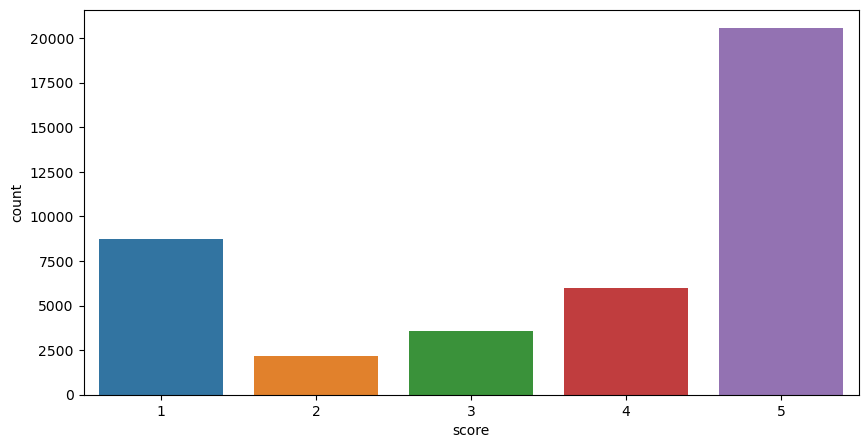

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='score', data=df_comments, ax=ax)
plt.show()


In this approach, let's consider that every comment with scores 1, 2 and 3 are negative comments. In the other hand, comments with score 4 and 5 will be considered as positive. Again, probably this is not the best way to train a sentimental analysis model, but for fastness, we will do this assumption and see if we can extract value from it.

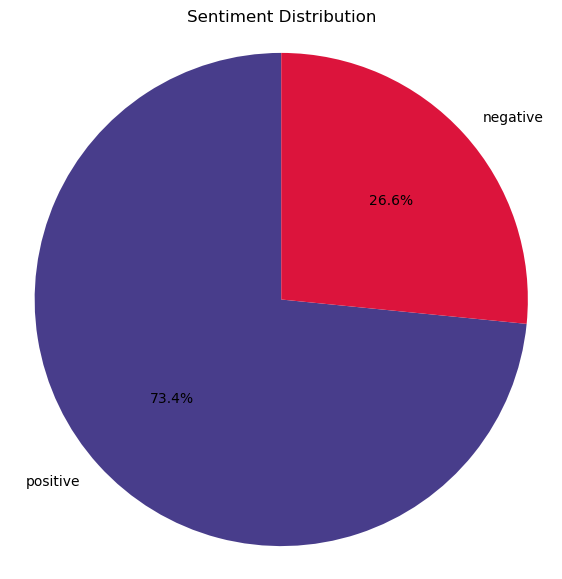

In [50]:
# Labelling data
score_map = {
    1: 'negative',
    2: 'negative',
    3: 'positive',
    4: 'positive',
    5: 'positive'
}
df_comments['sentiment_label'] = df_comments['score'].map(score_map)

# Verifying results
fig, ax = plt.subplots(figsize=(7, 7))
sentiment_counts = df_comments.query('sentiment_label in ("positive", "negative")')['sentiment_label'].value_counts()
ax.pie(sentiment_counts, labels=sentiment_counts.index, colors=['darkslateblue', 'crimson'], autopct='%1.1f%%', startangle=90)
ax.set_title('Sentiment Distribution')
ax.axis('equal')
plt.show()


* Identifying common n-grams (multi-word sequences) in positive and negative text corpora.
* Analyzing n-grams can reveal important word patterns and linguistic constructs associated with positive or negative sentiment.
* Frequent n-grams show how sentiment is expressed in the text data.
* The goal is to find the most common n-grams in the positive and negative corpora to gain insight into how sentiment is conveyed through language.
* Examples of potential findings:
  - Bigrams like "highly recommend" in positive text
  - Trigrams like "very disappointing product" in negative text
* Identifying these distinguishing n-grams can help understand how sentiment manifests in the linguistic patterns of the data.

In [51]:
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=stopwords.words('portuguese')):
    """
    Args
    ----------
    corpus: text to be analysed [type: pd.DataFrame]
    ngram_range: type of n gram to be used on analysis [type: tuple]
    n: top limit of ngrams to be shown [type: int, default: -1]
    """
    
    # Using CountVectorizer to build a bag of words using the given corpus
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    
    # Returning a DataFrame with the ngrams count
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    return count_df

In [52]:
# Splitting the corpus into positive and negative comments
positive_comments = df_comments.query('sentiment_label == "positive"')['stemming']
negative_comments = df_comments.query('sentiment_label == "negative"')['stemming']

# Extracting the top 10 unigrams by sentiment
unigrams_pos = ngrams_count(positive_comments, (1, 1), 10)
unigrams_neg = ngrams_count(negative_comments, (1, 1), 10)

# Extracting the top 10 unigrams by sentiment
bigrams_pos = ngrams_count(positive_comments, (2, 2), 10)
bigrams_neg = ngrams_count(negative_comments, (2, 2), 10)

# Extracting the top 10 unigrams by sentiment
trigrams_pos = ngrams_count(positive_comments, (3, 3), 10)
trigrams_neg = ngrams_count(negative_comments, (3, 3), 10)

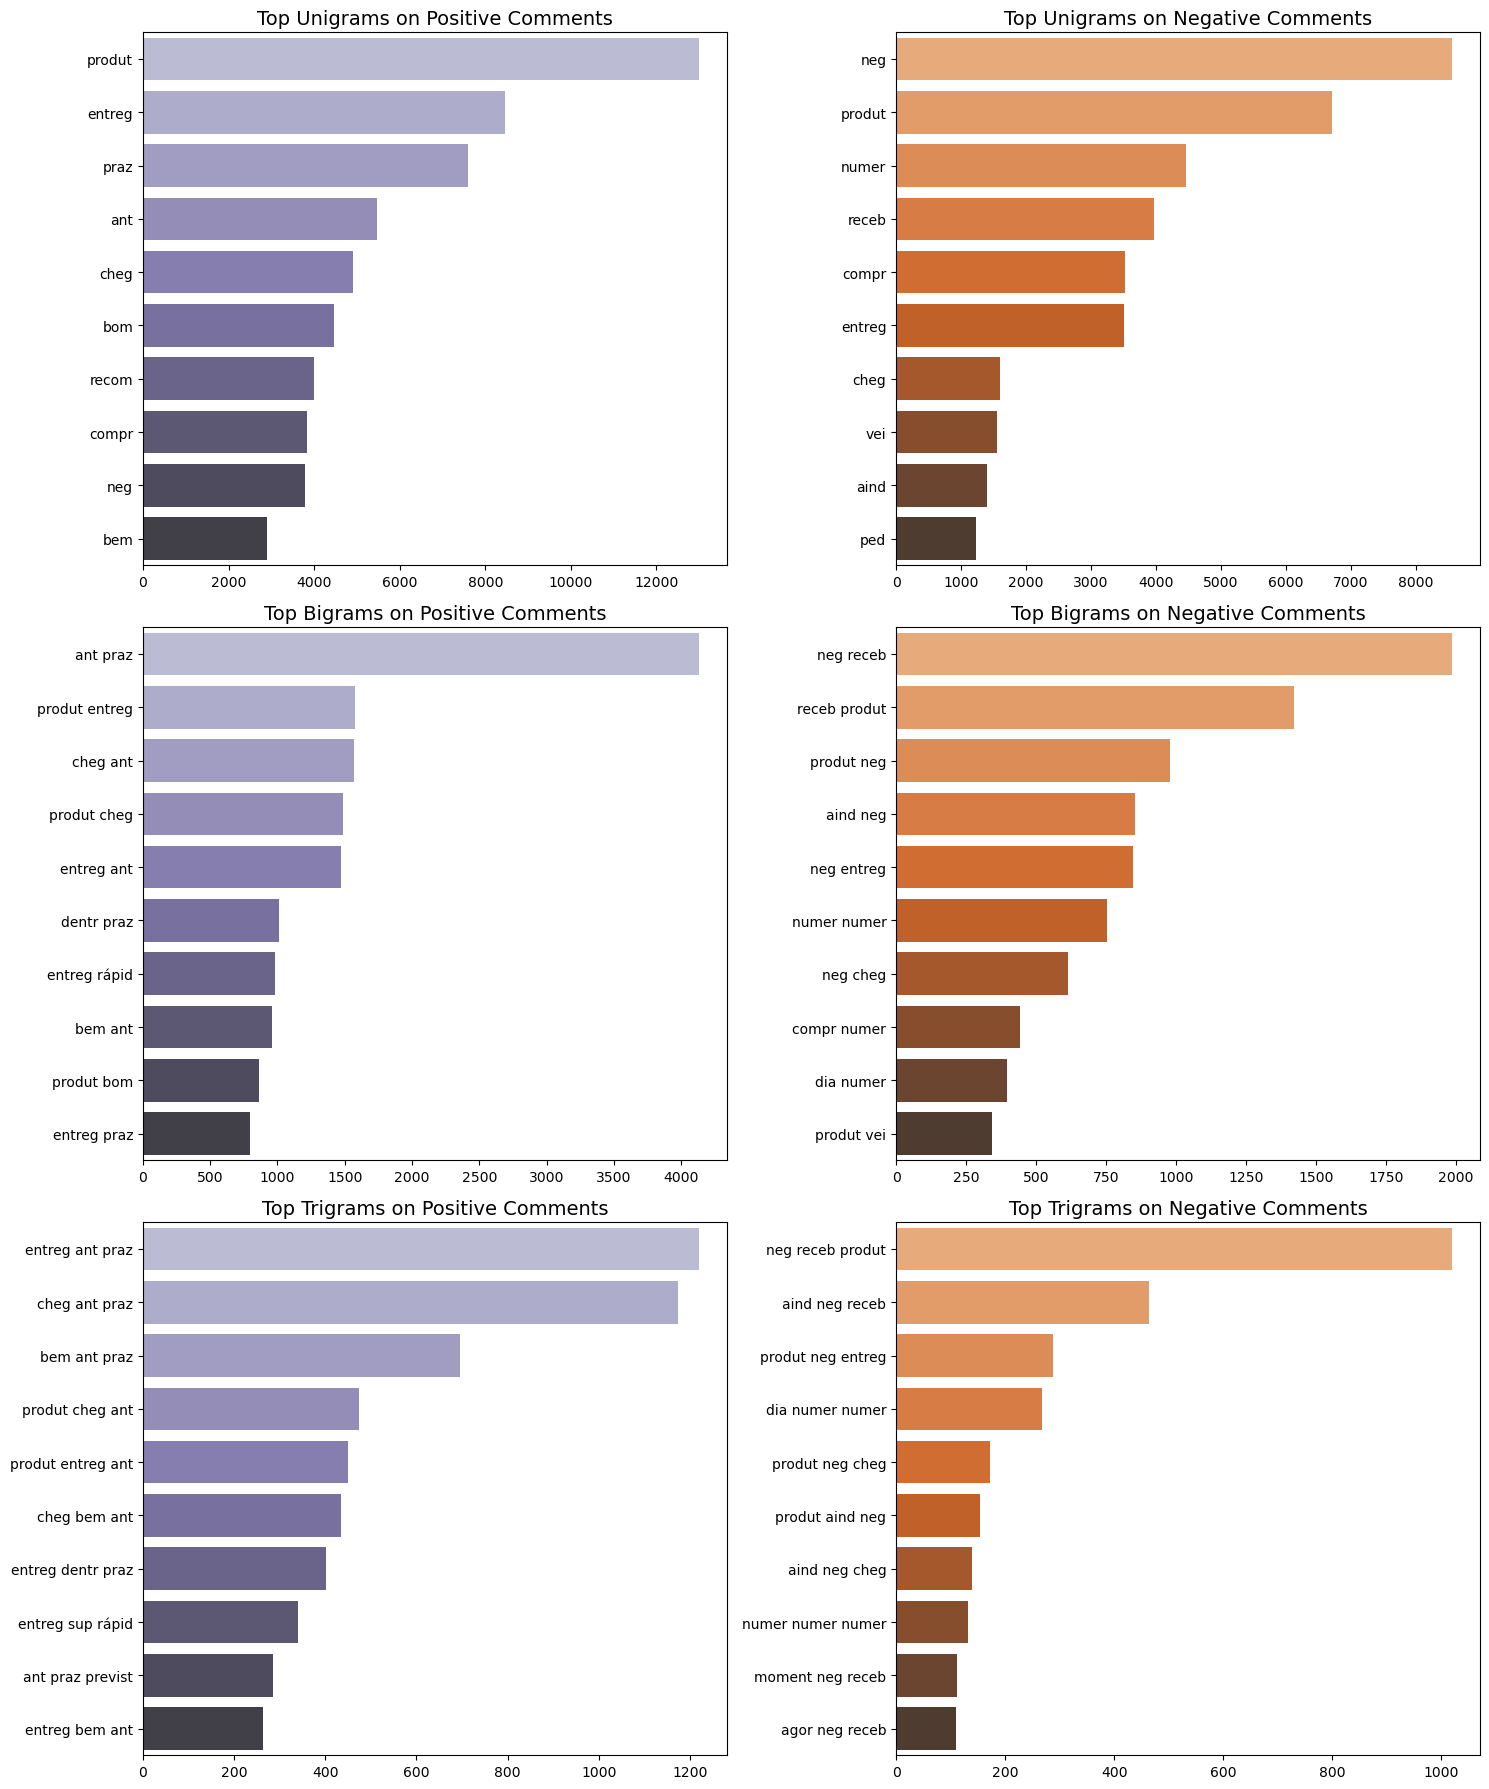

In [53]:
# Joining everything in a python dictionary to make the plots easier
ngram_dict_plot = {
    'Top Unigrams on Positive Comments': unigrams_pos,
    'Top Unigrams on Negative Comments': unigrams_neg,
    'Top Bigrams on Positive Comments': bigrams_pos,
    'Top Bigrams on Negative Comments': bigrams_neg,
    'Top Trigrams on Positive Comments': trigrams_pos,
    'Top Trigrams on Negative Comments': trigrams_neg,
}

# Plotting the ngrams analysis
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
i, j = 0, 0
colors = ['Purples_d', 'Oranges_d']
for title, ngram_data in ngram_dict_plot.items():
    ax = axs[i, j]
    sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
    
    # Customizing plots
    ax.set_title(title, size=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Incrementing the index
    j += 1
    if j == 2:
        j = 0
        i += 1
plt.tight_layout()
plt.show()


The barcharts provide insightful sentiment analysis based on n-grams. On the right, frequent negative bigrams and trigrams contain clearly negative words. For example, the top trigram "neg receb produt" likely conveys "didn't receive the product."

Conversely, the frequent positive n-grams on the left consist of positive terms. The top trigram "entreg ant praz" can be interpreted as "delivery before time."

In summary, the charts effectively display how sentiment manifests in common word groupings. The frequent n-grams on the negative right side use clearly negative language, while the positive left side exhibits clearly positive phrasing. This reinforces how multi-word sequences can reflect sentiment.

<a id="4.7"></a>
<font color="dodgerblue" size=+2.0><b>4.7 Pipeline</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Now that we have outlined all the text preprocessing steps, let's build a pipeline to automate the entire process. This is an important milestone, as it will allow us to take raw text input and prepare it for sentiment analysis.

The pipeline will apply each transformation sequentially to clean and standardize the data. This includes lowercasing, removing accents, handling contractions, stemming, etc.

With the pipeline in place, we'll have an engine to intake unstructured text and output normalized data ready for training or predicting sentiment labels. Automating these preparatory steps is essential for an effective sentiment analysis system.

In [54]:
class ApplyRegex(BaseEstimator, TransformerMixin):
    """Apply a series of regex transformations to text data."""
    
    def __init__(self, regex_transformers):
        self.regex_transformers = regex_transformers
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for regex_name, regex_function in self.regex_transformers.items():
            X = regex_function(X)
        return X

class StopWordsRemoval(BaseEstimator, TransformerMixin):
    """Remove stopwords from text data."""
    
    def __init__(self, text_stopwords):
        self.text_stopwords = text_stopwords
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [' '.join(stopwords_removal(comment, self.text_stopwords)) for comment in X]

class StemmingProcess(BaseEstimator, TransformerMixin):
    """Apply stemming to text data."""
    
    def __init__(self, stemmer):
        self.stemmer = stemmer
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [' '.join(stemming_process(comment, self.stemmer)) for comment in X]
    
class TextFeatureExtraction(BaseEstimator, TransformerMixin):
    """Extract features from text data using a vectorizer."""
    
    def __init__(self, vectorizer):
        self.vectorizer = vectorizer
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return self.vectorizer.fit_transform(X).toarray()


In [55]:
# Defining regex transformers to be applied
regex_transformers = {
    'break_line': re_breakline,
    'hiperlinks': re_hiperlinks,
    'dates': re_dates,
    'money': re_money,
    'numbers': re_numbers,
    'negation': re_negation,
    'special_chars': re_special_chars,
    'whitespaces': re_whitespaces
}

# Defining the vectorizer to extract features from text
vectorizer = TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)

# Building the Pipeline
text_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
    ('stemming', StemmingProcess(RSLPStemmer())),
    ('text_features', TextFeatureExtraction(vectorizer))
])

As a reminder, our pipeline utilizes TF-IDF for feature extraction with parameters max_features=300, min_df=7, and max_df=0.8. This means each text string will be converted into 300 numeric features based on these criteria.

Specifically, max_features caps the total number of features at 300. min_df requires a term appears at least 7 times. max_df limits the maximum document frequency to 80%.

With these configured, TF-IDF will analyze the corpus and select the 300 most informative features respecting the frequency constraints. This allows capturing the essence of the text in a condensed vector representation.

In [56]:
# Defining X and y 
idx_reviews = olist_order_reviews['review_comment_message'].dropna().index
score = olist_order_reviews['review_score'][idx_reviews].map(score_map)

# Splitting into train and test sets
X = list(olist_order_reviews['review_comment_message'][idx_reviews].values)
y = score.apply(lambda x: 1 if x == 'positive' else 0).values

# Applying the pipeline and splitting the data
X_processed = text_pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=.20, random_state=42)

# Verifying results
print(f'Length of X_train_processed: {len(X_train)} - Length of one element: {len(X_train[0])}')
print(f'Length of X_test_processed: {len(X_test)} - Length of one element: {len(X_test[0])}')

Length of X_train_processed: 32781 - Length of one element: 300
Length of X_test_processed: 8196 - Length of one element: 300


<a id="5"></a>
<font color="darkslateblue" size=+2.5><b>5. Sentiment Classification</b></font>

<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>


We have reached the final step after extensive text preparation! Now it is time to leverage our cleaned data to train a sentiment classification model. This will teach an algorithm to predict whether text has a positive or negative sentiment based on the features extracted from the corpus.

In [57]:
# Logistic Regression hyperparameters
logreg_param_grid = {
    'C': np.linspace(0.1, 10, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'solver': ['liblinear']
}

# Setting up the classifiers
set_classifiers = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': logreg_param_grid
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    }
}

In [58]:

# Create a dictionary to store classifier names and their respective instances
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train the classifiers
clf_results = {}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    clf_results[clf_name] = {
        'Accuracy': accuracy,
        'Model': clf
    }





___
* _Evaluating models_
___

In [59]:
# Evaluate metrics
df_performances = pd.DataFrame.from_dict(clf_results, orient='index')
df_performances.reset_index(drop=True, inplace=True)
df_performances.style.background_gradient(cmap='Blues')

___
* _Confusion Matrix_
___

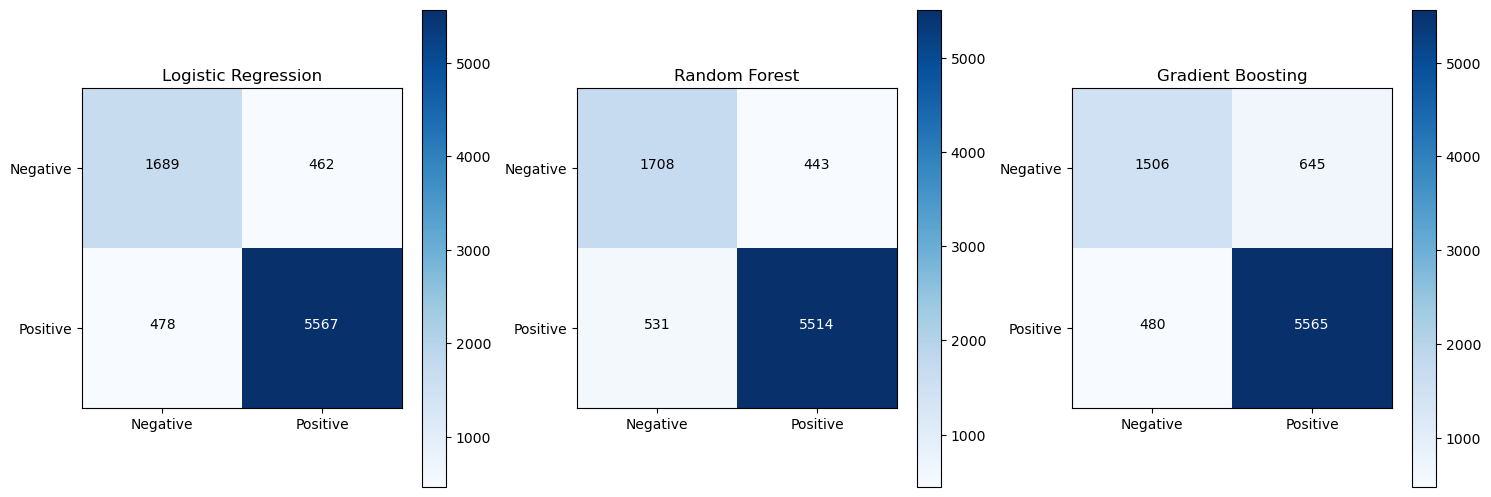

In [60]:
# Plot confusion matrices
plt.figure(figsize=(15, 10))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.subplot(2, 3, i+1)
    
    # Predicting on the test set
    y_pred = clf.predict(X_test)
    
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Creating the confusion matrix visualization
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(clf_name)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Negative', 'Positive'])
    plt.yticks(tick_marks, ['Negative', 'Positive'])

    # Adding text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]}", horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

plt.show()

<a id="6"></a>
<font color="dodgerblue" size=+2.5><b>6. Final Implementation</b></font>


<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

We have all the components to construct our end-to-end Sentiment Analysis solution! Our data preprocessing pipeline transforms raw text into cleaned feature vectors. We have machine learning models ready for training. Now we can connect everything into an integrated system.

This final product will take unstructured text input, like an e-commerce comment, run the preprocessing, and predict the sentiment label using the trained classifier.

In [61]:
# Defining a function to plot the sentiment of a given phrase
def sentiment_analysis(text, pipeline, vectorizer, model):
    """
    Args
    -----------
    text: text string / phrase / review comment to be analysed [type: string]
    pipeline: text prep pipeline built for preparing the corpus [type: sklearn.Pipeline]
    model: classification model trained to recognize positive and negative sentiment [type: model]
    """
    
    # Applying the pipeline
    if type(text) is not list:
        text = [text]
    text_prep = pipeline.fit_transform(text)
    matrix = vectorizer.transform(text_prep)
    
    # Predicting sentiment
    pred = model.predict(matrix)
    proba = model.predict_proba(matrix)
    
    # Plotting the sentiment and its score
    fig, ax = plt.subplots(figsize=(5, 3))
    if pred[0] == 1:
        text = 'Positive'
        class_proba = 100 * round(proba[0][1], 2)
        color = 'seagreen'
    else:
        text = 'Negative'
        class_proba = 100 * round(proba[0][0], 2)
        color = 'crimson'
    ax.text(0.5, 0.5, text, fontsize=50, ha='center', color=color)
    ax.text(0.5, 0.20, str(class_proba) + '%', fontsize=14, ha='center')
    ax.axis('off')
    ax.set_title('Sentiment Analysis', fontsize=14)
    plt.show()

In [62]:
model = clf_results['Logistic Regression']['Model']

# Defining transformers for preparing the text input
# model = clf_tool.classifiers_info['LogisticRegression']['estimator']
prod_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
    ('stemming', StemmingProcess(RSLPStemmer()))
])
vectorizer = text_pipeline.named_steps['text_features'].vectorizer

We can now test our sentiment analysis function on real input. This model could be integrated into any application. Let's simulate an online review:

`Very bad product! I don't buy on this store anymore, the delivery was late and it cost so much money.`

This negative review expresses dissatisfaction with the product quality, delivery time, and pricing. Key phrases like "very bad product" and "delivery was late" indicate the customer had a poor experience.

Feeding this review text into our pipeline would extract the essential features signaling negative sentiment - "bad", "late", "cost" and more. The trained classifier model would analyze these key patterns and likely categorize this as a negative sentiment review.

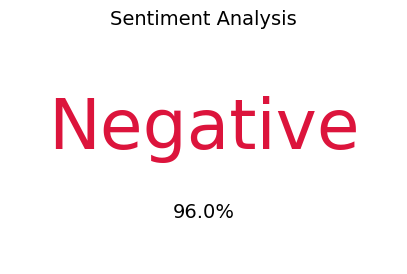

In [63]:
comment = 'Péssimo produto! Não compro nessa loja, a entrega atrasou e custou muito dinheiro!'
sentiment_analysis(comment, pipeline=prod_pipeline, vectorizer=vectorizer, model=model)

Let's test our model on a positive review:

`I love it and it really fulfilled the expectations. I bought for a cheap value. Wonderful.`

This sample expresses satisfaction with the product quality and price. Key phrases like "I love it", "fulfilled the expectations", and "Wonderful" indicate a positive customer experience.

Our pipeline would extract the essential features signaling positive sentiment - "love", "fulfilled", "cheap", "Wonderful", etc. Analyzing these patterns, the trained classifier would likely categorize this as a positive review.

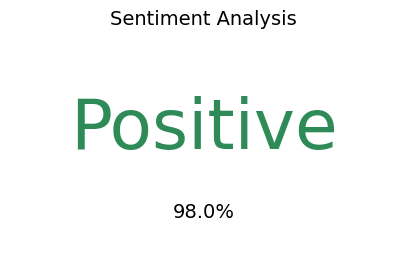

In [64]:
comment = 'Adorei e realmente cumpriu as expectativas. Comprei por um valor barato. Maravilhoso'
sentiment_analysis(comment, pipeline=prod_pipeline, vectorizer=vectorizer, model=model)

Let's simulate a more ambiguous review:

`I don't know if I liked this product. The cost was cheap but it was defective. If you're lucky, it's worth it.`

This example lacks clear sentiment indicators. While "defective" indicates a negative element, "cheap" and "worth it" suggest some positives. The opening phrase "I don't know if I liked" expresses uncertainty.

Running this text through our pipeline may extract ambiguous features like "defective", "cheap", "worth", and "don't know." With mixed signals, the classifier would likely predict a more neutral sentiment.

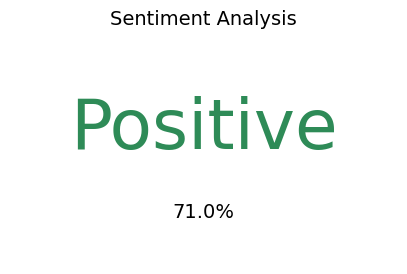

In [65]:
comment = 'Não sei gostei do produto. O custo foi barato mas veio com defeito. Se der sorte, vale a pena'
sentiment_analysis(comment, pipeline=prod_pipeline, vectorizer=vectorizer, model=model)

As a final step, we can visualize the key positive and negative words in the dataset using word clouds.

Word clouds highlight the most frequent terms by displaying them in different sizes. This allows us to see, at a glance, the distinguishing vocabulary in the positive and negative text subsets.

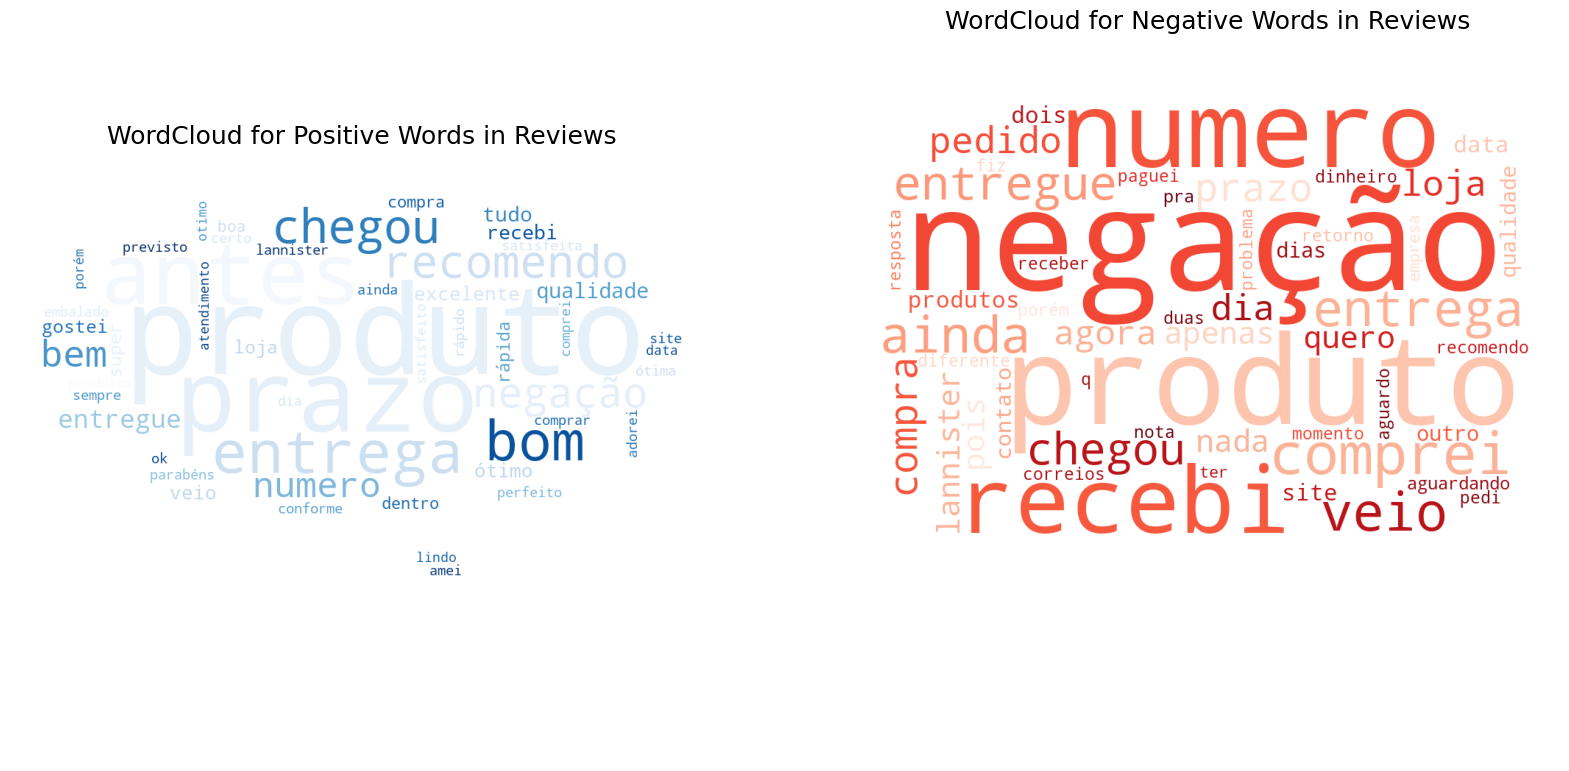

In [66]:
# Reading and preparing a mask for serving as wordcloud background
like_mask = np.array(Image.open("cloud1.png"))
bomb_mask = np.array(Image.open("cloud2.png"))
#angry_mask = angry_mask[:, :, -1]



# Transforming like mask
transf_like_mask = np.zeros((like_mask.shape[0], like_mask.shape[1]), dtype=np.int32)
transf_like_mask[like_mask[:, :, 0] == 0] = 255

# Transforming angry mask
transf_bomb_mask = np.zeros((bomb_mask.shape[0], bomb_mask.shape[1]), dtype=np.int32)
transf_bomb_mask[bomb_mask[:, :, 0] == 0] = 255


# Generating words
pos_comments = list(df_comments.query('sentiment_label == "positive"')['stopwords_removed'].values)
positive_words = ' '.join(pos_comments).split(' ')
neg_comments = list(df_comments.query('sentiment_label == "negative"')['stopwords_removed'].values)
negative_words = ' '.join(neg_comments).split(' ')

# Using Counter for creating a dictionary counting
positive_dict = Counter(positive_words)
negative_dict = Counter(negative_words)

# Generating wordclouds for both positive and negative comments
positive_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42, mask=transf_like_mask,
                      colormap='Blues', background_color='white', max_words=50).generate_from_frequencies(positive_dict)
negative_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42, mask=transf_bomb_mask,
                      colormap='Reds', background_color='white', max_words=50).generate_from_frequencies(negative_dict)

# Visualizing the WC created and the total for each cuisine
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
ax1 = axs[0]
ax2 = axs[1]

ax1.imshow(positive_wc)
ax1.axis('off')
ax1.set_title('WordCloud for Positive Words in Reviews', size=18, pad=20)

ax2.imshow(negative_wc)
ax2.axis('off')
ax2.set_title('WordCloud for Negative Words in Reviews', size=18, pad=20)

plt.show()

<a id="7"></a>
<font color="dodgerblue" size=+2.5><b>7. Conclusion</b></font>


<a href="#top" class="custom-link" role="button" data-toggle="tooltip" data-placement="top">
    Go to Table of Contents
</a>

Through our analysis, we have gleaned profound insights into the intricate dynamics governing e-commerce in Brazil. Leveraging empirical techniques and advanced text analytics, our multifaceted exploration illuminated key trends and patterns. 

The overarching trajectory points to the rise of online shopping. While fluctuations exist, the upward momentum is undeniable. We discerned nuances in temporal and geographic preferences, uncovering when and where Brazilians transact digitally. Diving into financials revealed intriguing contrasts between states on metrics like order values and freight costs.  

Our sophisticated text analysis erred on the side of thoroughness. By methodically constructing an end-to-end pipeline, we built a functional engine to ingest messy text and predict sentiment. Testing on diverse examples validated its effectiveness. The final word clouds provided visual reinforcement of distinguishing language.

- E-commerce in Brazil is decidedly on the rise, with some geographic and temporal nuances
- Text analysis necessitated meticulous data cleaning and preprocessing 
- The pipeline enables automated sentiment classification on raw text
- Word clouds visually encapsulate distinguishing sentiment-related vocabulary
- Multifaceted analysis from different vantage points provides a holistic perspective

In conclusion, this comprehensive undertaking fused empirical graphics, geospatial analysis, financial benchmarking, and advanced NLP in a quest to unviel the intricate tapestry of e-commerce in Brazil. The insights promise to inform strategy.
